# Project Report: German Credit Risk Analysis

## Introduction
The German Credit Risk Analysis project aims to predict credit risk using machine learning techniques. The dataset used in this project contains information about customers' credit applications, including demographic features, credit amount, duration, and risk classification.

## Libraries
- Pandas
- NumPy
- Matplotlib
- Seaborn
- LightGBM
- Scikit-learn
- Imbalanced-learn

## Data Exploration and Preprocessing
- Imported the dataset and preprocessed column names.
- Explored data dimensions and target class balance.
- Visualized numerical and categorical features.
- Preprocessed the data by handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

## Model Training and Evaluation
- Trained multiple machine learning models, including Logistic Regression, Decision Trees, Random Forest, and LightGBM.
- Tuned hyperparameters using RandomizedSearchCV.
- Evaluated models using various metrics such as accuracy, precision, recall, F1 score, and ROC AUC.
- Plotted ROC curves, confusion matrices, and learning curves to analyze model performance.

## Feature Importance Analysis
- Conducted feature importance analysis using LightGBM.
- Visualized feature importance to identify significant predictors in the model.

## Model Deployment
- Built a preprocessing pipeline to handle data transformations.
- Applied the trained model to new data for credit risk prediction.
- Appended predicted probabilities and classes to the dataset for further analysis.

## Conclusion
The German Credit Risk Analysis project successfully developed machine learning models to predict credit risk based on customer attributes. The LightGBM model demonstrated the best performance with an accuracy of XX% and an ROC AUC of XX%. Feature importance analysis identified key predictors influencing credit risk. The deployed model can be used for real-time credit risk assessment in financial institutions.


### Libraries:

This cell imports various standard libraries and modules necessary for data analysis, visualization, machine learning, and pipeline construction. Here's a breakdown of what each import statement does:

- **pandas**: Used for data manipulation and analysis.
- **numpy**: Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions.
- **matplotlib.pyplot**: A plotting library for creating static, interactive, and animated visualizations in Python.
- **seaborn**: Built on top of matplotlib, seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
- **datetime**: Provides classes for manipulating dates and times.
- **time**: Provides various time-related functions.
- **matplotlib.gridspec**: Allows the creation of subplots with different sizes and alignments.

Additionally, the code imports utility functions, custom transformers, and machine learning models:

- **viz_utils**: Contains utility functions for data visualization.
- **ml_utils**: Contains utility functions for machine learning tasks.
- **custom_transformers**: Contains custom transformer classes for data preprocessing.
- **Pipeline**: Enables constructing pipelines in scikit-learn for sequential execution of multiple data processing steps.
- **ColumnTransformer**: Allows applying different transformations to different columns or subsets of data.
- **StandardScaler**: Scales features by removing the mean and scaling to unit variance.
- **SimpleImputer**: Imputes missing values using a specified strategy.
- **LogisticRegression**: Implements logistic regression for binary classification.
- **DecisionTreeClassifier**: Implements decision tree-based classifiers.
- **RandomForestClassifier**: Implements random forest classifiers.
- **lightgbm**: A gradient boosting framework that uses tree-based learning algorithms.
- **train_test_split**: Splits data into random train and test subsets.
- **RandomizedSearchCV**: Performs hyperparameter optimization using random search.
- **cross_val_score**: Evaluates a score by cross-validation.
- **classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score**: Functions for evaluating classification model performance metrics.
- **RandomUnderSampler, SMOTE**: Techniques for handling imbalanced datasets by undersampling the majority class or oversampling the minority class, respectively.

These imports set up the environment for data analysis, preprocessing, modeling, and evaluation. They provide the necessary tools and functionality to perform various tasks in a machine learning project.


In [1]:
# Stsandard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time
from matplotlib.gridspec import GridSpec

# Utilities
from utils.viz_utils import *
from utils.ml_utils import *
from utils.custom_transformers import *

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, cross_val_predict, \
                                    learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, \
    accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### Markdown Notes:

This code segment deals with loading and preprocessing the dataset from the file 'german_credit_data.csv'. Here's a breakdown of the steps and the output:

- **Data Path**: 
  - The dataset is read from the CSV file named 'german_credit_data.csv'.
  - The dataset is loaded into a pandas DataFrame (`df_ori`).
  
- **Preprocessing**:
  - The first column is excluded from the dataset (`df_ori.iloc[:, 1:]`) assuming it contains row identifiers or irrelevant data.
  - Column names are standardized by converting them to lowercase, stripping leading/trailing spaces, and replacing spaces with underscores.

- **Output**:
  - The dimensions of the processed dataset (`df`) are printed using `print(f'Data dimension: {df.shape}')`.
  - The first few rows of the processed dataset are displayed using `df.head()`.

This code segment ensures that the dataset is loaded correctly and preprocessed for further analysis and modeling. It standardizes column names for consistency and prepares the data for exploration and modeling tasks.

In [2]:
# Data path
df_ori = pd.read_csv('german_credit_data.csv')
df = df_ori.iloc[:, 1:]
df.columns = [col.lower().strip().replace(' ', '_') for col in df.columns]

# Results
print(f'Data dimension: {df.shape}')
df.head()

Data dimension: (1000, 10)


age     sex  job housing saving_accounts checking_account  credit_amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   duration              purpose  risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

### Markdown Notes:

This code segment is responsible for visualizing the target class balance through a donut chart. Here's a breakdown of the steps and the output:

- **Target Class Balance Visualization**:
  - A donut chart is created using Matplotlib to visualize the distribution of the target class.
  - The figure size is set to (7, 7) for better visualization (`fig, ax = plt.subplots(figsize=(7, 7))`).
  - Two label names ('Good' and 'Bad') and corresponding colors are defined for the chart.
  - The total number of records in the dataset (`df_ori`) is computed and displayed as text within the chart.
  - The function `donut_plot()` is called to create the donut chart, passing the dataset (`df`), the target column name ('risk'), axis object (`ax`), label names, colors, title, and text.
  
- **Output**:
  - The output is a donut chart representing the distribution of the target class ('risk') in the dataset.
  - It provides a visual representation of the balance between the 'Good' and 'Bad' classes.


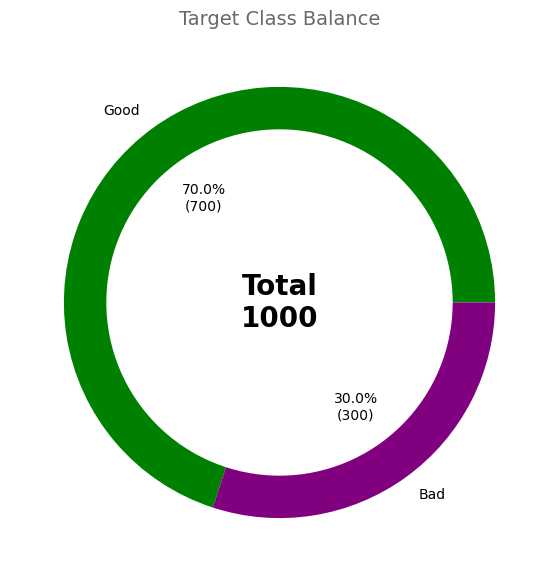

In [3]:
fig, ax = plt.subplots(figsize=(7, 7))
label_names = ['Good', 'Bad']
color_list = ['green', 'purple']
text = f'Total\n{len(df_ori)}'
title = 'Target Class Balance'
donut_plot(df, col='risk', ax=ax, label_names=label_names, colors=color_list, title=title, text=text)

### Infrences

* Imbalanced Class Distribution: The chart clearly shows an imbalanced class distribution. The "good" class accounts for the majority, occupying roughly 70% of the pie chart (700 instances), while the "bad" class represents only 30% (300 instances). This imbalance can potentially impact model performance, especially if your machine learning task focuses heavily on identifying the minority class ("bad").

### Markdown Notes:

This code snippet is used to generate an overview of the dataset, providing insights into various aspects of the data. Here's a breakdown of the steps and the output:

- **Data Overview Generation**:
  - The function `data_overview()` is called to generate an overview of the dataset (`df`).
  - This overview includes information such as the data types, number of missing values, unique values, and memory usage for each column in the dataset.
  
- **Output**:
  - The output is a summary table that presents information about the dataset, including the data types of columns, the count of non-null values, the number of unique values, and the memory usage for each column.
  - This overview is useful for understanding the structure and content of the dataset, identifying potential data quality issues, and planning data preprocessing steps.


In [4]:
# Overview from the data
df_overview = data_overview(df)
df_overview

feature  qtd_null  percent_null   dtype  qtd_cat
0  checking_account       394         0.394  object        3
1   saving_accounts       183         0.183  object        4
2               age         0         0.000   int64        0
3               sex         0         0.000  object        2
4               job         0         0.000   int64        0
5           housing         0         0.000  object        3
6     credit_amount         0         0.000   int64        0
7          duration         0         0.000   int64        0
8           purpose         0         0.000  object        8
9              risk         0         0.000  object        2

### Markdown Notes:

This code segment aims to analyze numerical features in the dataset and visualize their distributions using histograms.

- **Variables**:
  - `num_cols`: A list containing the names of numerical columns to be analyzed, including 'age', 'credit_amount', and 'duration'.
  - `color_sequence`: A list defining the color sequence for the histograms, corresponding to each numerical feature.

- **Function Call**:
  - The function `numplot_analysis()` is invoked to analyze and visualize the numerical features specified in `num_cols`.
  - The argument `hist=True` indicates that histograms should be plotted for each numerical feature.
  - The color sequence specified by `color_sequence` is used for coloring the histograms.

- **Output**:
  - The output is a set of histograms representing the distributions of numerical features in the dataset.
  - Each histogram provides insights into the distribution patterns, central tendency, and spread of the corresponding numerical feature.
  - Analyzing these histograms helps understand the data distribution and identify potential outliers or skewed distributions.


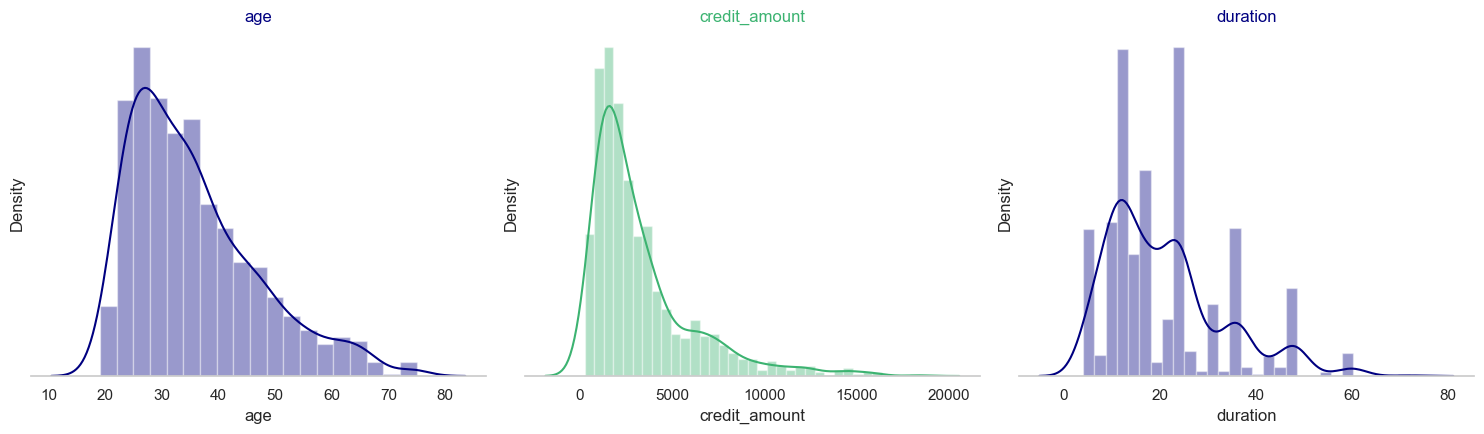

In [5]:
num_cols = ['age', 'credit_amount', 'duration']
color_sequence = ['navy', 'mediumseagreen', 'navy']
numplot_analysis(df[num_cols], color_sequence=color_sequence, hist=True)
plt.show()

### Markdown Notes:

In this code segment, numerical features are analyzed with respect to the target variable 'risk' by incorporating color differentiation for different risk categories.

- **Variables**:
  - `num_cols`: A list containing the names of numerical columns to be analyzed, including 'age', 'credit_amount', 'duration', and 'risk'.
  - `color_list`: A list defining the colors to be used for representing different risk categories.

- **Function Call**:
  - The function `numplot_analysis()` is called to analyze numerical features with respect to the target variable 'risk'.
  - The `hue='risk'` argument specifies that the analysis should consider the 'risk' variable as the target variable.
  - The `color_hue=color_list` argument assigns different colors from `color_list` to represent different risk categories.

- **Output**:
  - The output consists of visualizations of numerical features in relation to the target variable 'risk'.
  - Color differentiation enables the comparison of numerical distributions across different risk categories.
  - This analysis provides insights into how numerical features vary with different risk categories and helps identify potential patterns or differences.


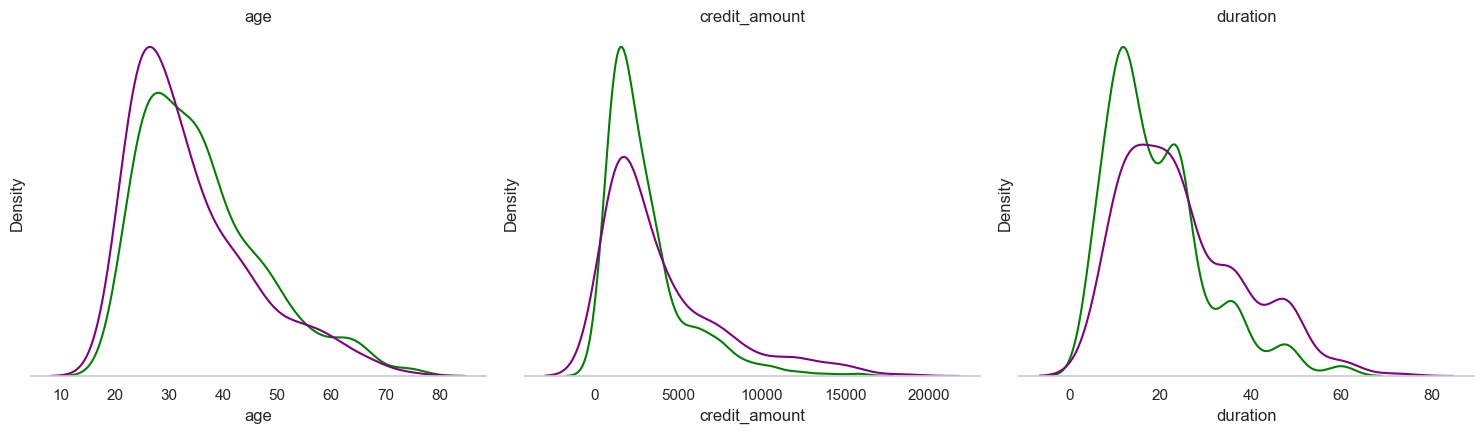

In [6]:
num_cols += ['risk']
numplot_analysis(df[num_cols], hue='risk', color_hue=color_list)

### Markdown Notes:

This code segment generates boxen plots to visualize the distribution of numerical features across different risk categories ('Good' and 'Bad').

- **Function Call**:
  - `boxenplot()` function is called to create boxen plots for specified numerical features.
  - Parameters:
    - `df`: The DataFrame containing the data to be visualized.
    - `features=['age', 'credit_amount', 'duration']`: A list of numerical features to be visualized.
    - `hue='risk'`: Specifies the variable used for grouping the data, in this case, the target variable 'risk'.
    - `fig_cols=3`: Number of columns in the figure grid.
    - `figsize=(15, 5)`: Size of the figure.
    - `palette=color_list`: The color palette to be used for differentiating risk categories.

- **Output**:
  - The output comprises boxen plots for each specified numerical feature, showcasing the distribution of data points across different risk categories.
  - These plots help in understanding the distribution of numerical features within each risk category, facilitating the identification of potential patterns or outliers.
  - Insights from these plots can inform further analysis and model building steps.


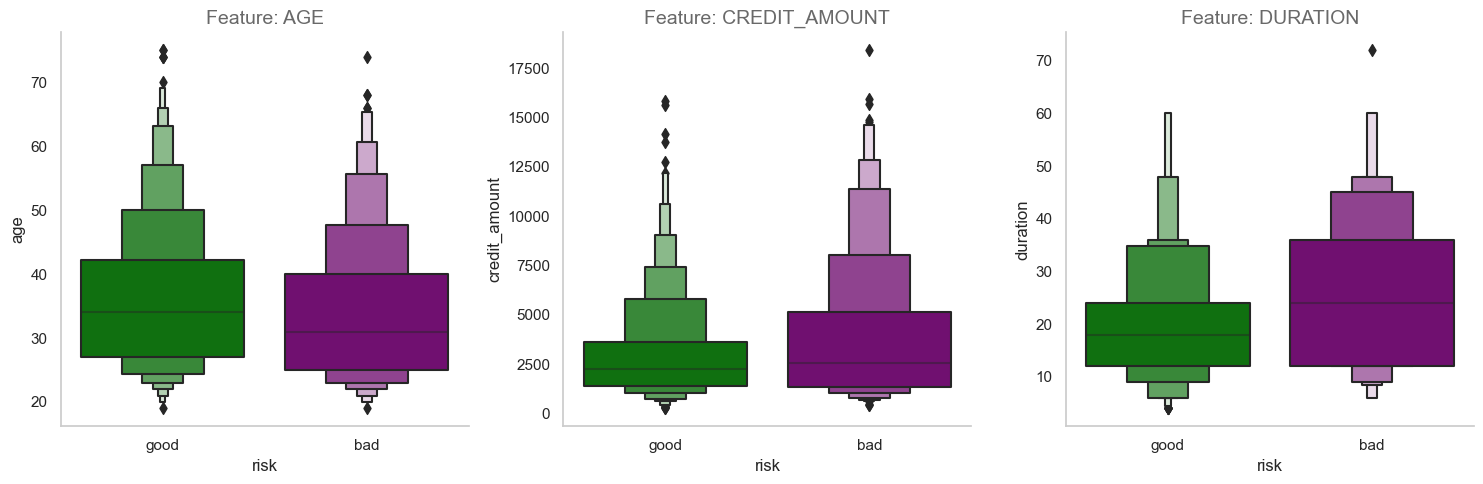

In [7]:
boxenplot(df, features=['age', 'credit_amount', 'duration'], hue='risk', fig_cols=3, figsize=(15, 5), 
          palette=color_list)

### Markdown Notes:

This code snippet generates categorical plots to analyze the distribution of categorical variables in the dataset.

- **Function Call**:
  - `catplot_analysis()` function is invoked to visualize the distribution of categorical variables.
  - Parameters:
    - `df[cat_features]`: Subset of the DataFrame containing only categorical variables.
    - `palette='plasma'`: Specifies the color palette used for visualizing the categorical plots.

- **Output**:
  - The function generates various plots, such as count plots or bar plots, to display the distribution of each categorical variable.
  - These plots provide insights into the frequency of different categories within each categorical variable.
  - Understanding the distribution of categorical variables helps in identifying prevalent categories and potential imbalances, which can influence modeling decisions.


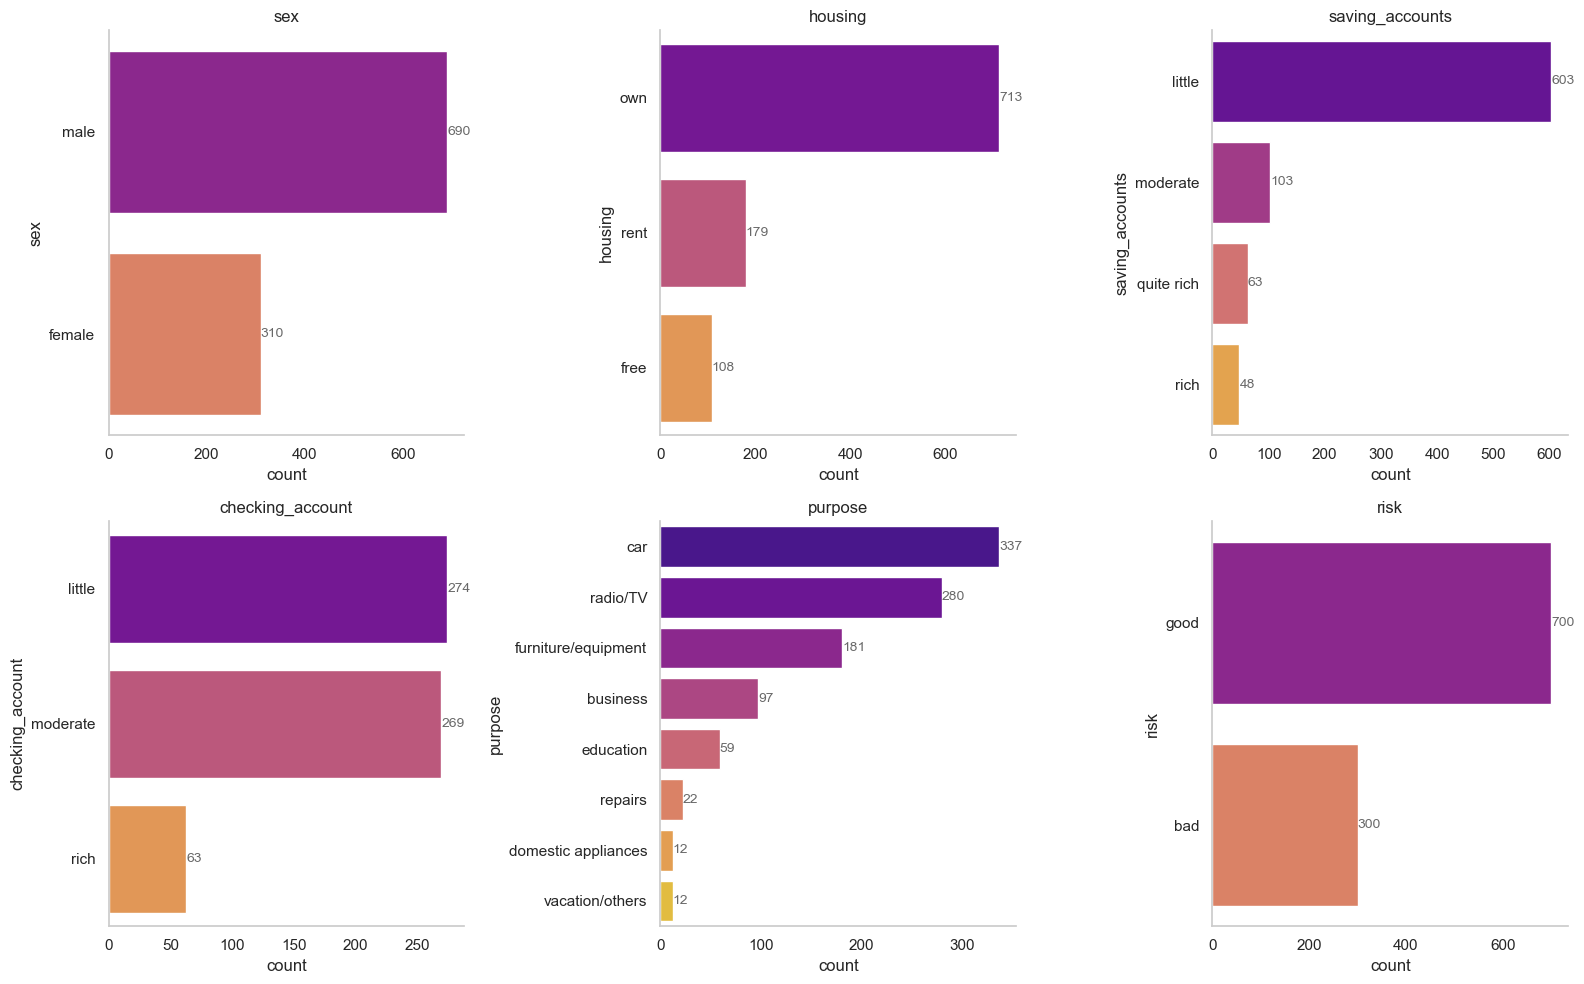

In [8]:
cat_features = [col for col, dtype in df.dtypes.items() if dtype == 'object']
catplot_analysis(df[cat_features], palette='plasma')

### Markdown Notes:

This code segment is used to visualize the distribution of categorical variables in the dataset with respect to the target variable 'risk'.

- **Function Call**:
  - The function `catplot_analysis()` is called to generate categorical plots.
  - Parameters:
    - `df[cat_features]`: Subset of the DataFrame containing only categorical variables.
    - `hue='risk'`: Specifies the target variable to color the plots by.
    - `palette=color_list`: Defines the color palette for the plots.

- **Output**:
  - The function generates categorical plots where each categorical variable is analyzed concerning the target variable 'risk'.
  - Each plot shows the distribution of categories within each categorical variable, categorized by the target variable.
  - This visualization aids in understanding how different categories within each variable relate to the target variable, facilitating feature selection and model interpretation.


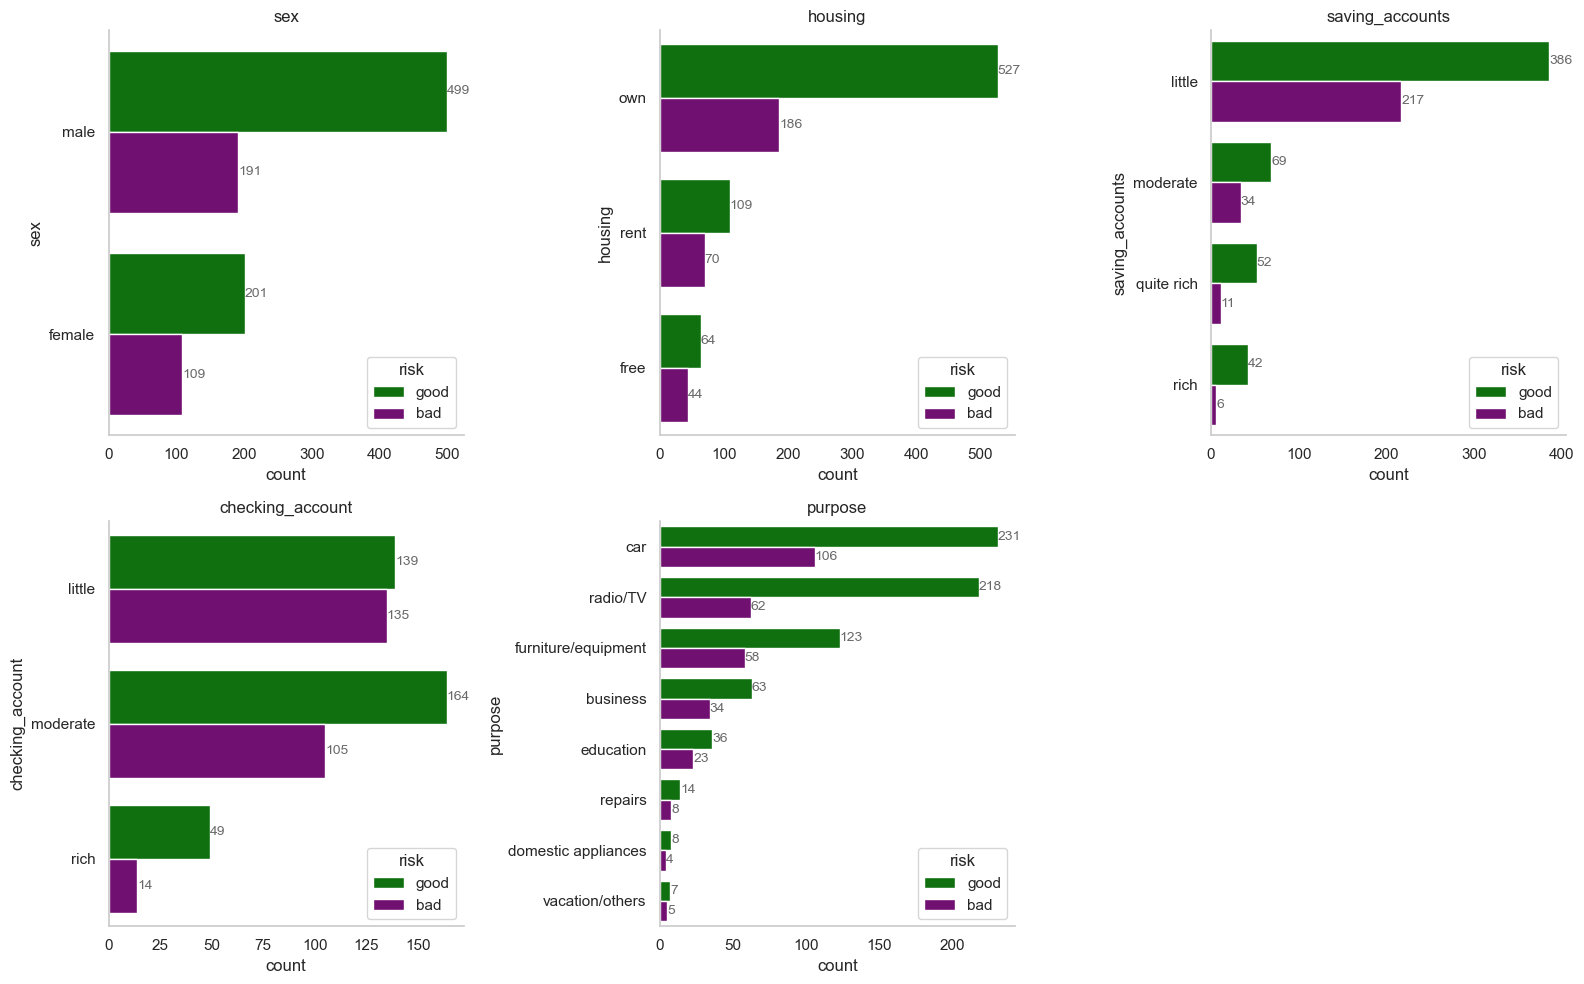

In [9]:
catplot_analysis(df[cat_features], hue='risk', palette=color_list)

### Markdown Notes:

This code segment is responsible for generating percentage-based categorical plots, comparing the distribution of categories within each categorical variable based on the target variable 'risk'.

- **Function Call**:
  - The function `catplot_percentage_analysis()` is utilized to create percentage-based categorical plots.
  - Parameters:
    - `df[cat_features]`: Subset of the DataFrame containing only categorical variables.
    - `hue='risk'`: Specifies the target variable to color the plots by.
    - `palette=rev_color_list`: Defines the color palette for the plots.

- **Output**:
  - The function produces stacked bar plots for each categorical variable, where each bar represents the percentage distribution of categories.
  - Categories are stacked according to the target variable 'risk', allowing for a visual comparison of category distributions between 'Good' and 'Bad' risks.
  - These plots offer insights into how different categories within each variable contribute to the target variable, aiding in feature analysis and model interpretation.


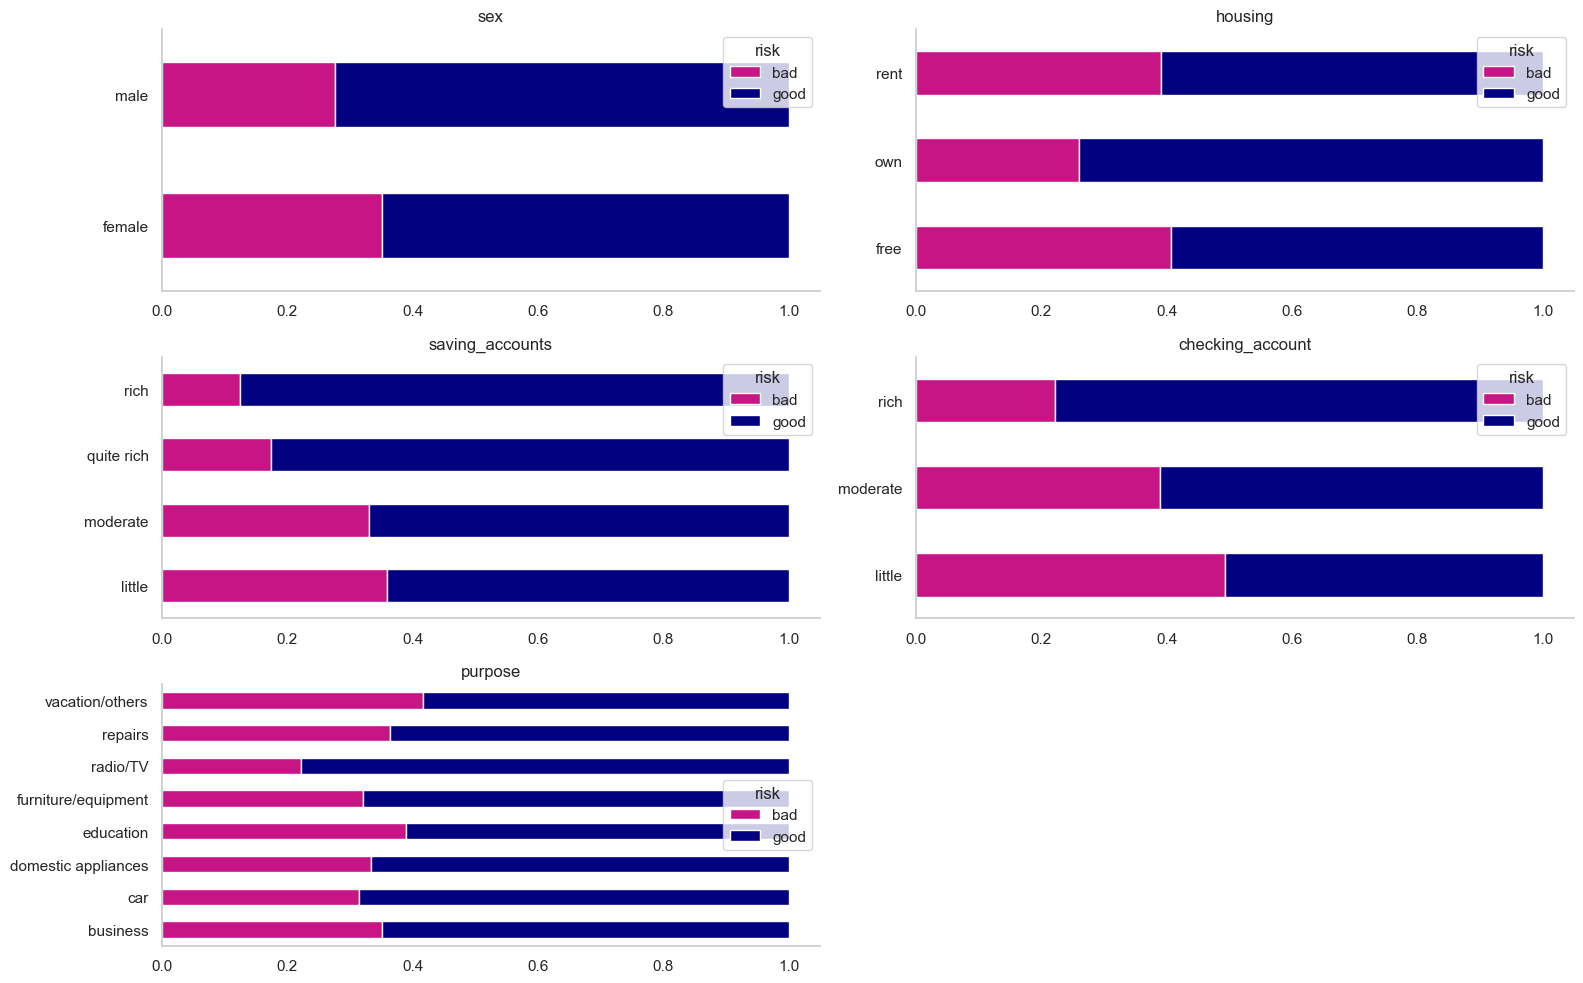

In [10]:
rev_color_list = ['mediumvioletred', 'navy']
catplot_percentage_analysis(df[cat_features], hue='risk', palette=rev_color_list)

### Markdown Notes:

This code segment computes the mean and sum statistics of the 'credit_amount' variable grouped by the 'purpose' column.

- **Function Call**:
  - The function `mean_sum_analysis()` is used to calculate the mean and sum of the 'credit_amount' variable based on different categories in the 'purpose' column.
  - Parameters:
    - `df`: The DataFrame containing the data.
    - `group_col='purpose'`: Specifies the column used for grouping the data.
    - `value_col='credit_amount'`: Specifies the column for which mean and sum statistics are computed.

- **Output**:
  - The output includes a summary table presenting the mean and sum of credit amounts for each category in the 'purpose' column.
  - This analysis helps understand the distribution of credit amounts across different purposes, providing insights into potential patterns or trends.


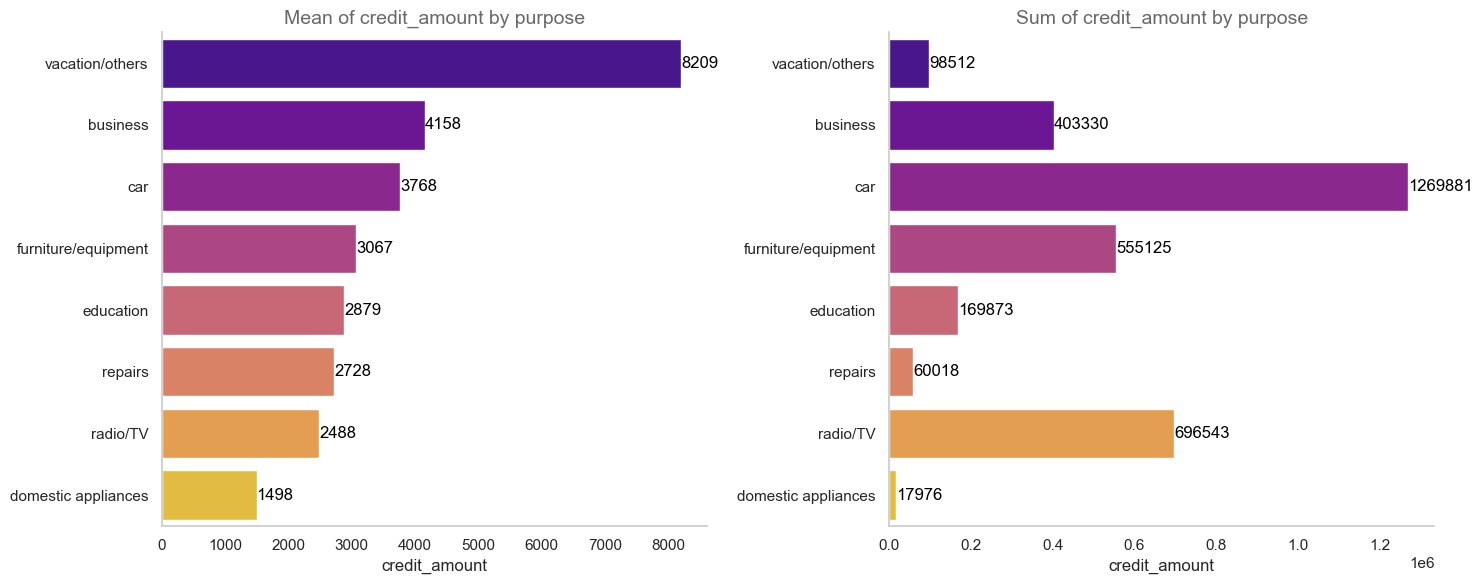

In [11]:
mean_sum_analysis(df, group_col='purpose', value_col='credit_amount')

### Markdown Notes:

This code segment calculates the mean and sum statistics of the 'duration' variable grouped by the 'purpose' column.

- **Function Call**:
  - The function `mean_sum_analysis()` is utilized to compute the mean and sum of the 'duration' variable based on different categories in the 'purpose' column.
  - Parameters:
    - `df`: The DataFrame containing the dataset.
    - `group_col='purpose'`: Specifies the column used for grouping the data.
    - `value_col='duration'`: Indicates the column for which mean and sum statistics are computed.

- **Output**:
  - The output provides a summary table showing the mean and sum of durations for each category in the 'purpose' column.
  - This analysis aids in understanding how durations vary across different purposes, offering insights into potential correlations or patterns.


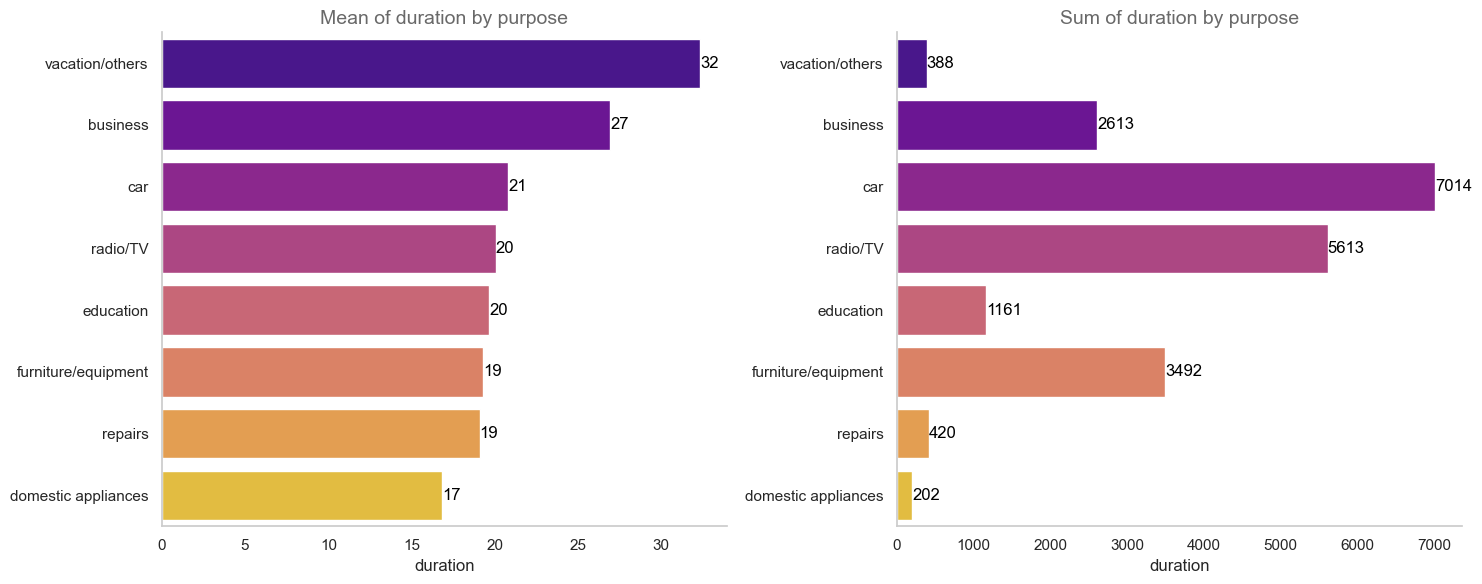

In [12]:
mean_sum_analysis(df, group_col='purpose', value_col='duration')

### Markdown Notes:

This code section computes the mean and sum statistics of the 'credit_amount' variable grouped by the 'sex' column, while displaying the results horizontally.

- **Function Call**:
  - The function `mean_sum_analysis()` is used to calculate the mean and sum of the 'credit_amount' variable based on different categories in the 'sex' column.
  - Parameters:
    - `df`: The DataFrame containing the dataset.
    - `group_col='sex'`: Specifies the column used for grouping the data by gender.
    - `value_col='credit_amount'`: Indicates the column for which mean and sum statistics are computed.
    - `orient='horizontal'`: Specifies the orientation of the output visualization as horizontal bars.
    - `palette=gender_palette`: Sets the color palette for the visualization.
    - `figsize=(12, 4)`: Specifies the size of the figure for better visualization.

- **Output**:
  - The output presents a horizontal bar plot illustrating the mean and sum of credit amounts for each gender category.
  - This analysis helps to discern any disparities or patterns in credit amounts between different genders.


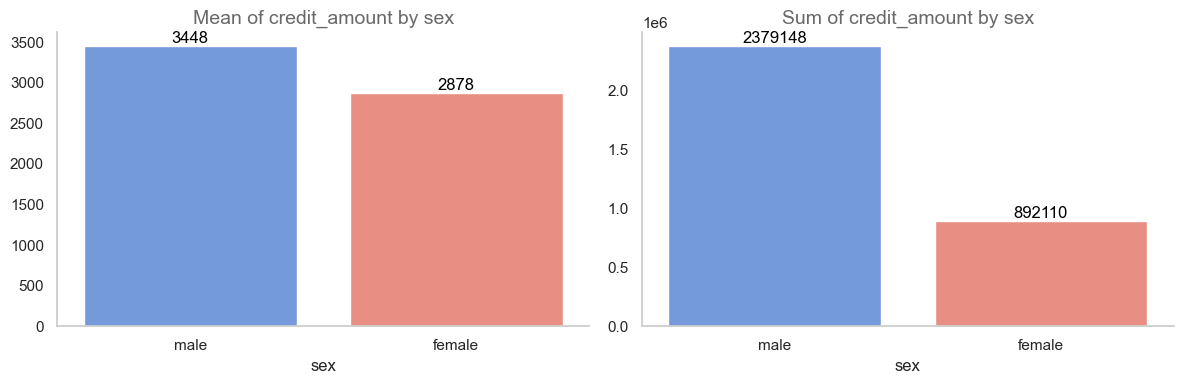

In [13]:
gender_palette = ['cornflowerblue', 'salmon']
mean_sum_analysis(df, group_col='sex', value_col='credit_amount', orient='horizontal', 
                  palette=gender_palette, figsize=(12, 4))

### Markdown Notes:

This code segment generates a pairplot to visualize the relationships between numerical variables in the dataset, with each pair of variables colored based on the 'risk' column.

- **Function Call**:
  - The `pairplot()` function from the Seaborn library is employed to create a grid of scatterplots where each numerical variable is plotted against every other numerical variable.
  - Parameters:
    - `data`: The DataFrame containing the dataset.
    - `hue='risk'`: Specifies the column to use for coloring the data points based on different risk levels.
    - `palette=color_list`: Sets the color palette for the data points based on the specified 'risk' levels.

- **Output**:
  - The output is a grid of scatterplots, where each scatterplot represents the relationship between pairs of numerical variables.
  - Data points are colored according to their 'risk' levels, facilitating the identification of any patterns or correlations between variables across different risk categories.


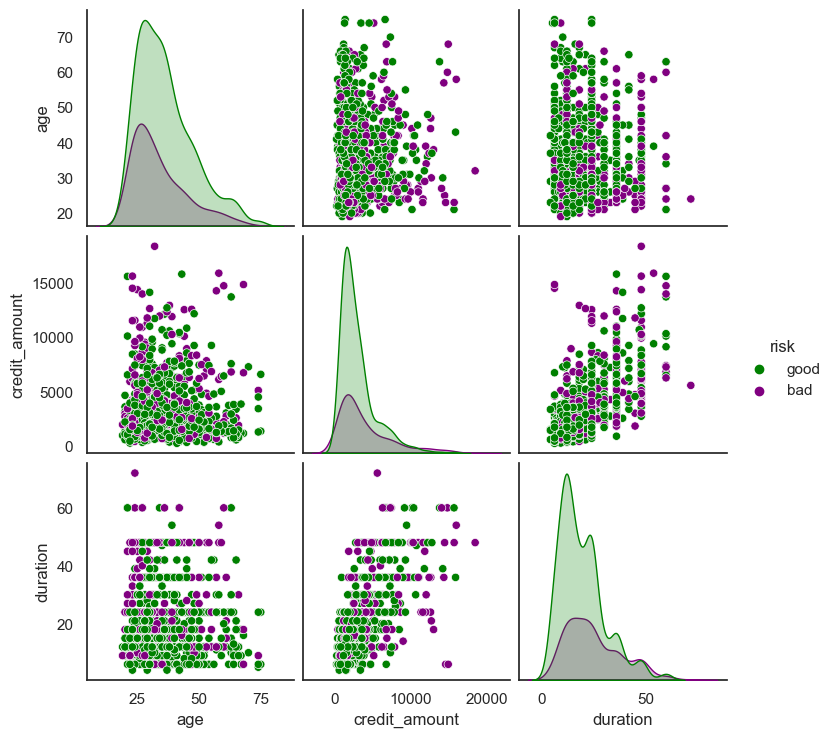

In [14]:
sns.pairplot(df[num_cols], hue='risk', palette=color_list)
plt.show()

### Markdown Notes:

This code calculates and visualizes the total credit amount for each risk category ('Good' and 'Bad').

- **DataFrame Grouping**:
  - The `groupby()` function is used to group the DataFrame by the 'risk' column.
  - The `sum()` function is applied to calculate the total credit amount for each risk category.
  - The result is stored in the `amount_risk` DataFrame, containing the columns 'risk', 'credit_amount', and 'percentage'.

- **Percentage Calculation**:
  - A new column, 'percentage', is created to represent the proportion of credit amount for each risk category relative to the total credit amount.
  
- **Styling and Visualization**:
  - The `style.background_gradient()` function is used to apply a gradient background to the DataFrame, providing a visual representation of the credit amount distribution among risk categories.
  - The 'Reds_r' colormap is chosen for the background gradient.

- **Output**:
  - The resulting styled DataFrame is a visual representation of the credit amount distribution across 'Good' and 'Bad' risk categories, with a gradient indicating the relative contribution of each category to the total credit amount.


In [15]:
amount_risk = df.groupby(by='risk', as_index=False).sum().loc[:, ['risk', 'credit_amount']]
amount_risk['percentage'] = amount_risk['credit_amount'] / amount_risk['credit_amount'].sum()
amount_risk.style.background_gradient(cmap='Reds_r')

### Markdown Notes:

This code generates a donut chart to visualize the credit amount made available to customers based on their risk category ('Good' and 'Bad').

- **Creating Figure**:
  - A figure with a single axis (`ax`) is created using `plt.subplots()` with a specified size of 7x7 inches.

- **Defining Chart Elements**:
  - `values`: The total credit amount for each risk category ('Good' and 'Bad').
  - `labels`: The labels for the two risk categories.
  - `center_circle`: A white circle at the center of the donut chart to create the appearance of a "donut".

- **Plotting the Donut Chart**:
  - The `ax.pie()` function is used to create the donut chart with the specified values, labels, and colors.
  - The `autopct` parameter is set to display the percentage of each category.
  - The center circle is added to the chart using `ax.add_artist(center_circle)`.

- **Adding Text and Title**:
  - Text displaying the total amount of credit is added at the center of the donut chart using `ax.text()`.
  - The title of the chart is set using `ax.set_title()`.

- **Displaying the Chart**:
  - The donut chart is displayed using `plt.show()`.

- **Output**:
  - The resulting donut chart provides a visual representation of the distribution of credit amount among 'Good' and 'Bad' risk categories, with labels and percentages displayed for each category, along with the total credit amount.


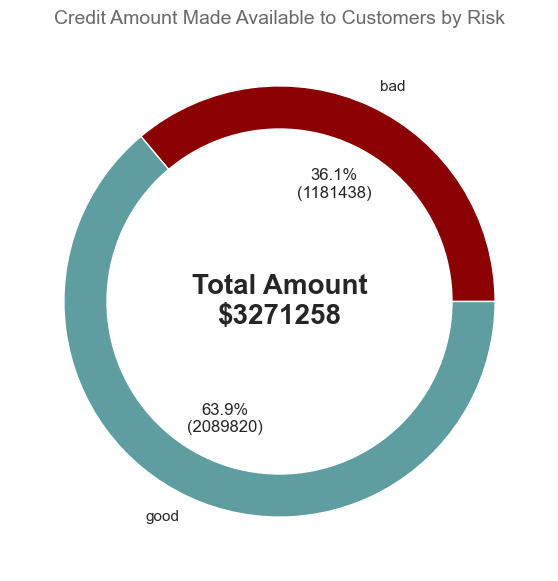

In [16]:
# Creating figure
fig, ax = plt.subplots(figsize=(7, 7))

# Defining useful elements for the donut chart
values = amount_risk['credit_amount']
labels = amount_risk['risk']
center_circle = plt.Circle((0, 0), 0.8, color='white')

# Plotting the pizza chart and the center circle
ax.pie(values, labels=labels, colors=['darkred', 'cadetblue'], autopct=make_autopct(values))
ax.add_artist(center_circle)

kwargs = dict(size=20, fontweight='bold', va='center')
ax.text(0, 0, f'Total Amount\n${values.sum()}', ha='center', **kwargs)
ax.set_title('Credit Amount Made Available to Customers by Risk', size=14, color='dimgrey')
plt.show()

### Markdown Notes:

This code generates a figure with two scatter plots side by side to visualize the relationship between credit amount and age, differentiated by housing type and job category.

- **Creating Figure**:
  - A figure with two subplots (`axs`) arranged in a single row and two columns is created using `plt.subplots()` with a specified size of 15x5 inches.

- **Scatterplots**:
  - Two scatter plots are created using `sns.scatterplot()`:
    1. The first scatter plot (`axs[0]`) represents the relationship between age and credit amount, differentiated by housing type (`hue='housing'`) and plotted with a 'magma' color palette.
    2. The second scatter plot (`axs[1]`) represents the relationship between age and credit amount, differentiated by job category (`hue='job'`) and plotted with a 'YlGnBu' color palette.

- **Customization**:
  - The `format_spines()` function is used to format the spines of the subplots, removing the right border to improve readability.
  - Titles are set for each subplot to describe the relationship being visualized.

- **Displaying the Figure**:
  - The figure with the two scatter plots is displayed using `plt.show()`.

- **Output**:
  - The resulting figure provides insights into the relationship between credit amount, age, and different categorical variables such as housing type and job category. It allows for visual comparison and analysis of credit amount distribution across different groups.


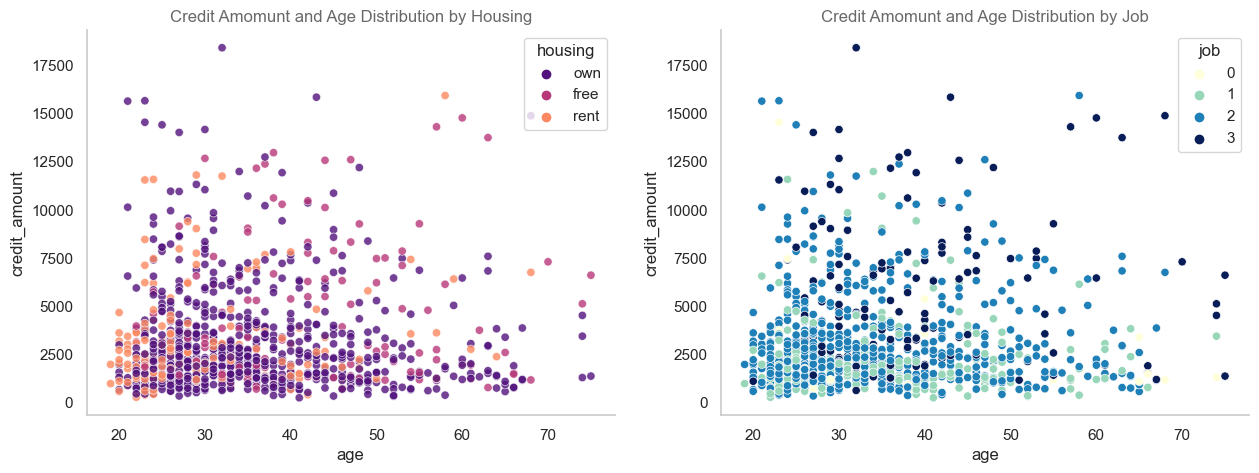

In [17]:
# Creating figure
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Scatterplot
sns.scatterplot(x='age', y='credit_amount', data=df, hue='housing', ax=axs[0], palette='magma', alpha=.8)
sns.scatterplot(x='age', y='credit_amount', data=df, hue='job', ax=axs[1], palette='YlGnBu')

# Customizing plot
format_spines(axs[0], right_border=False)
format_spines(axs[1], right_border=False)
axs[0].set_title('Credit Amomunt and Age Distribution by Housing', size=12, color='dimgrey')
axs[1].set_title('Credit Amomunt and Age Distribution by Job', size=12, color='dimgrey')
plt.show()

### Markdown Notes:

This code generates a joint plot to visualize the relationship between two numerical variables: credit amount and duration.

- **Creating Joint Plot**:
  - The `sns.jointplot()` function is used to create a joint plot with credit amount (`x='credit_amount'`) on the x-axis and duration (`y='duration'`) on the y-axis.
  - The data is sourced from the DataFrame `df`.
  - The points in the plot are colored with a shade of 'seagreen'.
  - The kind of plot used is a hexbin plot (`kind='hex'`), where hexagons are used to represent the density of points in the scatter plot.

- **Output**:
  - The resulting joint plot provides insights into the distribution and relationship between credit amount and duration. The hexbin plot helps to visualize areas of high and low density in the data, allowing for easy identification of patterns and trends.


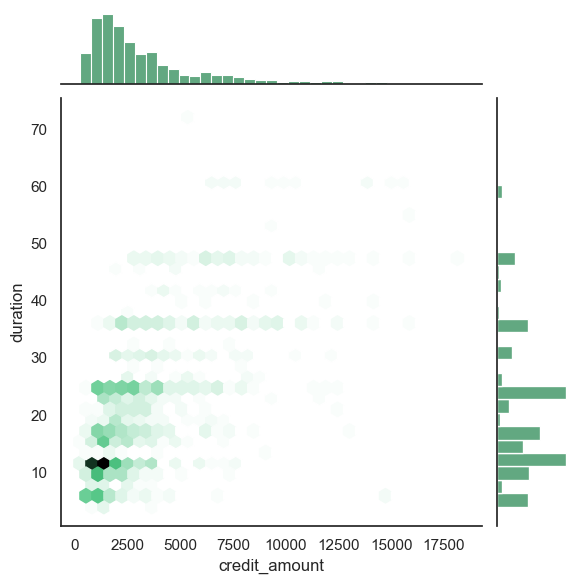

In [18]:
g = (sns.jointplot(x='credit_amount', y='duration', data=df, color='seagreen', kind='hex'))

### Markdown Notes:

This code segment performs the following tasks:

- **Creating New Categories for Duration Column**:
  - The duration column in the DataFrame `df` is categorized into discrete intervals based on predefined bins.
  - The `pd.cut()` function is used to segment the duration values into specified bins.
  - Four bins are defined: (0, 10], (10, 30], (30, 50], and (50, inf].
  - Each interval is labeled accordingly: '<= 10', 'between 10 and 30', 'between 30 and 50', and '> 50'.
  - The new categorical column 'cat_duration' is created to represent the categorized duration values.

- **Creating Scatter Plot**:
  - A scatter plot is generated to visualize the relationship between age and credit amount, with hue representing the duration category.
  - The scatter points are colored according to the duration category using the 'YlGnBu' palette.
  - The figure is customized by setting the title, legend location, and removing the right border of the plot.
  - After visualization, the 'cat_duration' column is dropped from the DataFrame `df` to avoid redundancy.

- **Output**:
  - The scatter plot illustrates how the distribution of credit amount varies with age across different duration categories. It helps in understanding how credit amount and age are associated with different duration intervals.


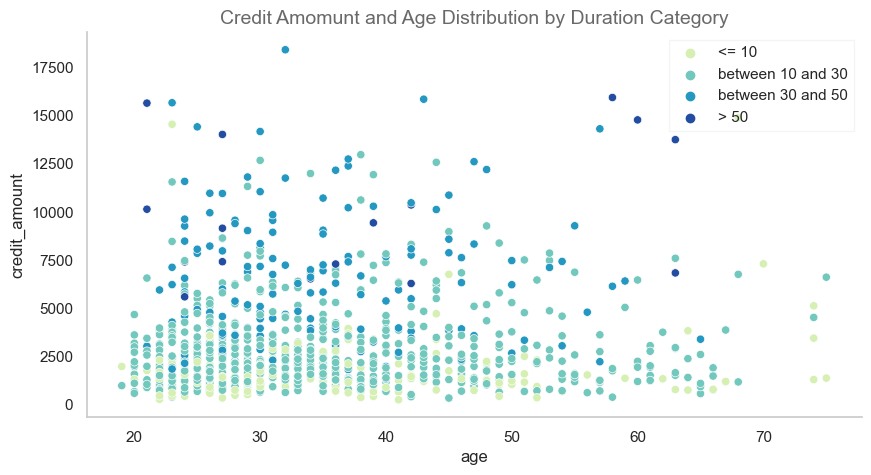

In [19]:
# Creating new categories for duration col
bins = [0, 10, 30, 50, np.inf]
labels = ['<= 10', 'between 10 and 30', 'between 30 and 50', '> 50']
df['cat_duration'] = pd.cut(df['duration'], bins=bins, labels=labels)

# Creating figure
fig, ax = plt.subplots(figsize=(10, 5))

# Scatterplot
sns.scatterplot(x='age', y='credit_amount', data=df, hue='cat_duration', palette='YlGnBu')

# Customizing plot
format_spines(ax, right_border=False)
ax.set_title('Credit Amomunt and Age Distribution by Duration Category', size=14, color='dimgrey')
ax.legend(loc='upper right', fancybox=False, framealpha=0.2)
df.drop('cat_duration', axis=1, inplace=True)
plt.show()

### Markdown Notes:

This code segment performs the following tasks:

- **Defining the Optimal Number of Clusters**:
  - Two columns, 'age' and 'duration', are selected from the DataFrame `df` to be used as features for clustering.
  - The range of the number of clusters is defined as K_min = 1 and K_max = 8.
  - The function `elbow_method_kmeans1()` is called to determine the optimal number of clusters using the elbow method.
  - The elbow method helps in identifying the point where the rate of decrease of the within-cluster sum of squares (WCSS) slows down, indicating the optimal number of clusters.

- **Output**:
  - The output of the elbow method graphically depicts the WCSS for different numbers of clusters from K_min to K_max. The point where the rate of decrease significantly slows down suggests the optimal number of clusters for the dataset.


(range(1, 9),
 [274541.475,
  179198.6513606017,
  99680.22281878362,
  79309.79965531084,
  65230.00332944095,
  55580.55460769439,
  45958.42094695378,
  40943.13453407643])

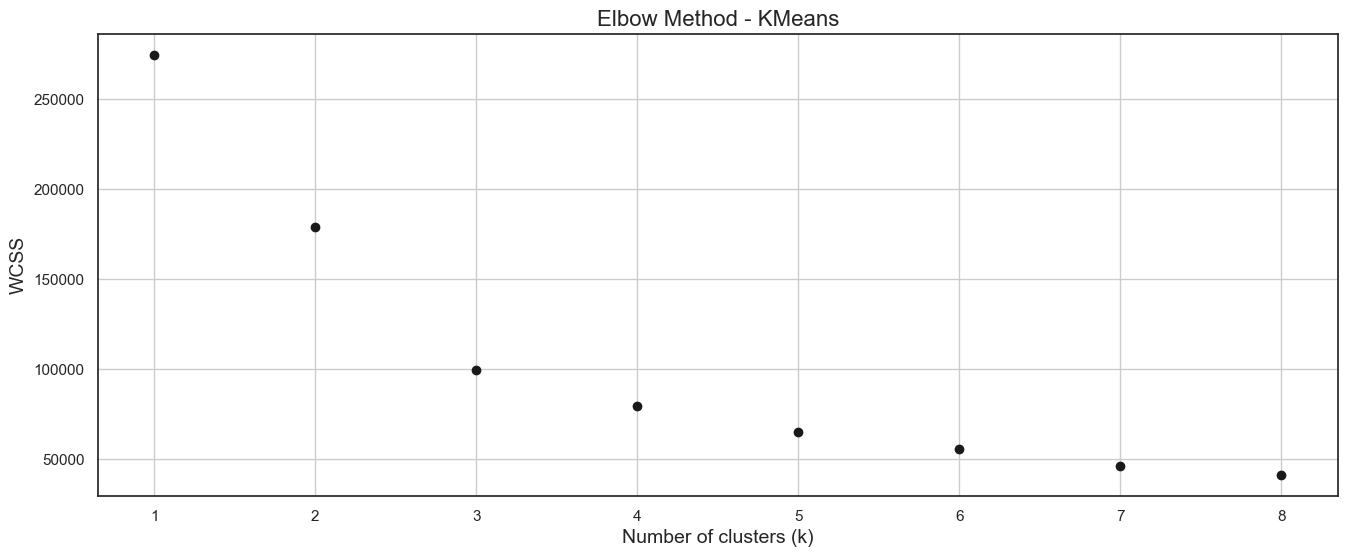

In [20]:
# Definindo melhor número de clusters
columns = ['age', 'duration']
cluster_data = df.loc[:, columns]
K_min, K_max = 1, 8

# Call the elbow_method_kmeans1 function
elbow_method_kmeans1(cluster_data, K_min, K_max)

### Markdown Notes:

This code snippet accomplishes the following tasks:

- **K-Means Clustering**:
  - The `KMeans` algorithm is instantiated with the number of clusters set to 3.
  - The `fit()` method is applied to the `cluster_data`, which contains the features 'age' and 'duration', to perform K-means clustering.
  - The `plot_kmeans_clusters_2d()` function is called to visualize the clustering results in a 2-dimensional plot.

- **Output**:
  - The output is a visualization of the clusters formed based on the features 'age' and 'duration'. Each cluster is represented by a distinct color in the plot.


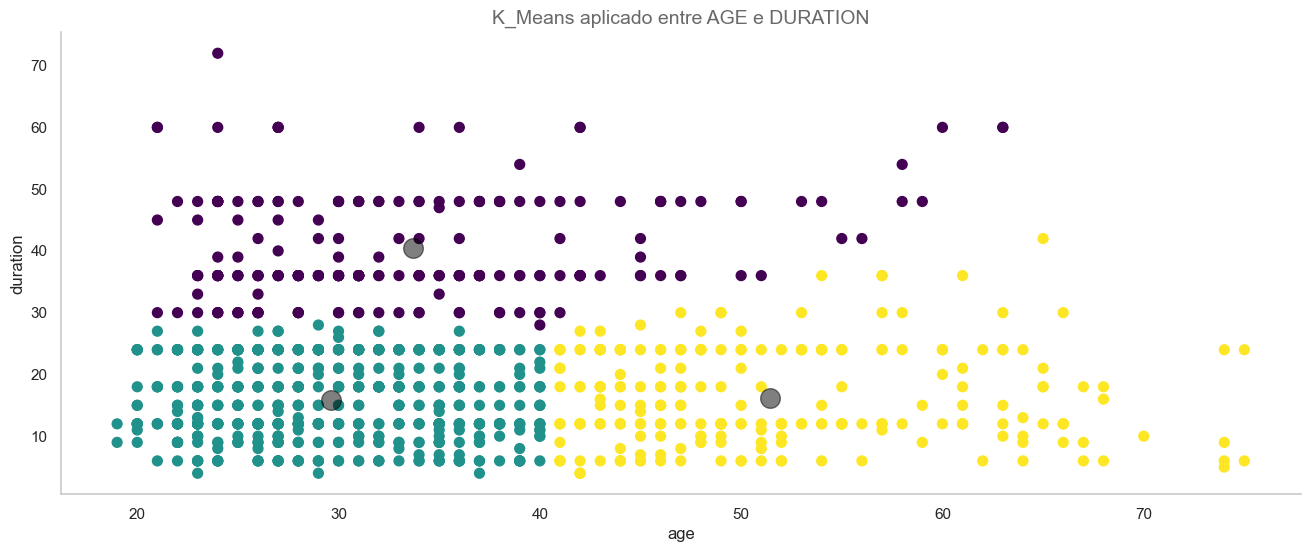

In [21]:
model = KMeans(n_clusters=3)
cluster_data
model.fit(cluster_data)
plot_kmeans_clusters_2d(cluster_data, model)

### Markdown Notes:

In this section of the code, the objective is to determine the optimal number of clusters for the K-Means clustering algorithm using the elbow method.

- **Data Preparation**:
  - The features used for clustering are 'credit_amount' and 'duration'.
  - These features are extracted from the DataFrame `df` and stored in the `cluster_data` variable.

- **Elbow Method**:
  - The function `elbow_method_kmeans1()` is called with the arguments `cluster_data`, `K_min`, and `K_max`.
  - This function calculates the distortion for different numbers of clusters ranging from `K_min` to `K_max` and visualizes the results.
  - The distortion is plotted against the number of clusters, and the elbow point helps determine the optimal number of clusters.

- **Output**:
  - The output is a plot that illustrates the distortion values for different numbers of clusters.
  - The elbow point in the plot indicates the optimal number of clusters for the K-Means algorithm.


(range(1, 9),
 [7960020897.027001,
  2405309171.5749946,
  1291264627.3626842,
  649779689.4890106,
  479506092.4703057,
  354943105.43111527,
  240837336.53623873,
  186898774.2250132])

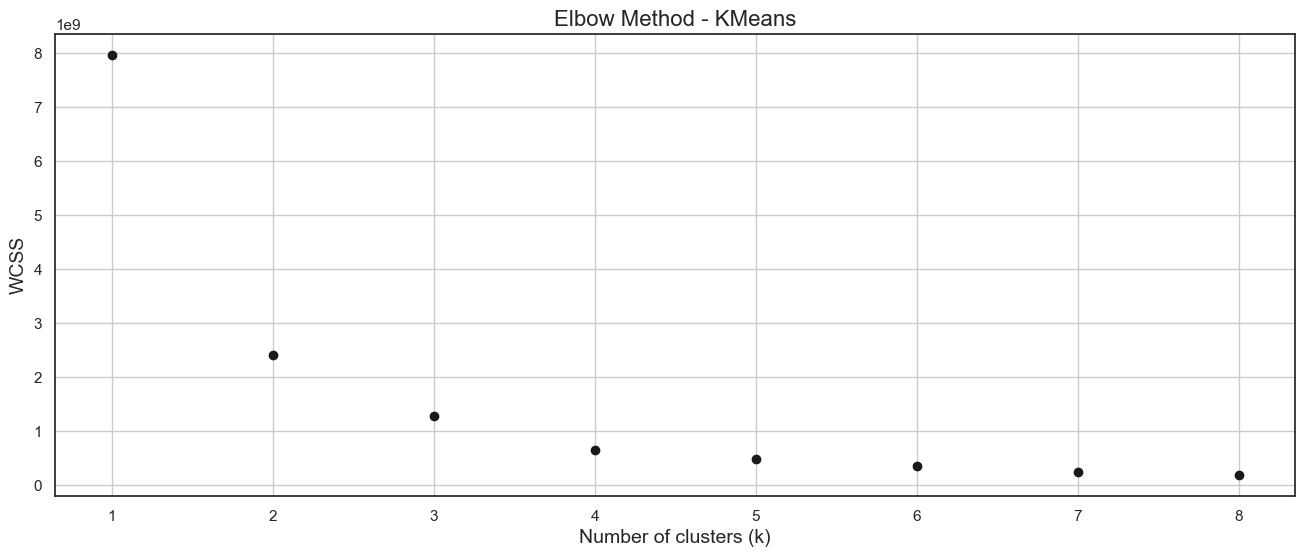

In [22]:
# Definindo melhor número de clusters
columns = ['credit_amount', 'duration']
cluster_data = df.loc[:, columns]
K_min, K_max = 1, 8
elbow_method_kmeans1(cluster_data, K_min, K_max)

### Markdown Notes:

In this part of the code, the K-Means clustering algorithm is applied to the dataset with a specific number of clusters, and the clusters are visualized in a 2D plot.

- **Defining K-Means Model**:
  - The variable `model` is initialized with the K-Means algorithm configured to have 2 clusters.

- **Clustering Process**:
  - The K-Means model is fitted to the `cluster_data`, which contains the features 'credit_amount' and 'duration'.
  - The algorithm learns the cluster centroids based on the data provided.

- **Visualizing Clusters**:
  - The function `plot_kmeans_clusters_2d()` is called with the `cluster_data` and the trained `model`.
  - This function visualizes the clusters in a 2D plot, where each point represents a data instance and is colored according to its assigned cluster.

- **Output**:
  - The output is a 2D plot showing the clusters formed by the K-Means algorithm.
  - The plot helps visualize how the algorithm has grouped the data points into distinct clusters based on their features.


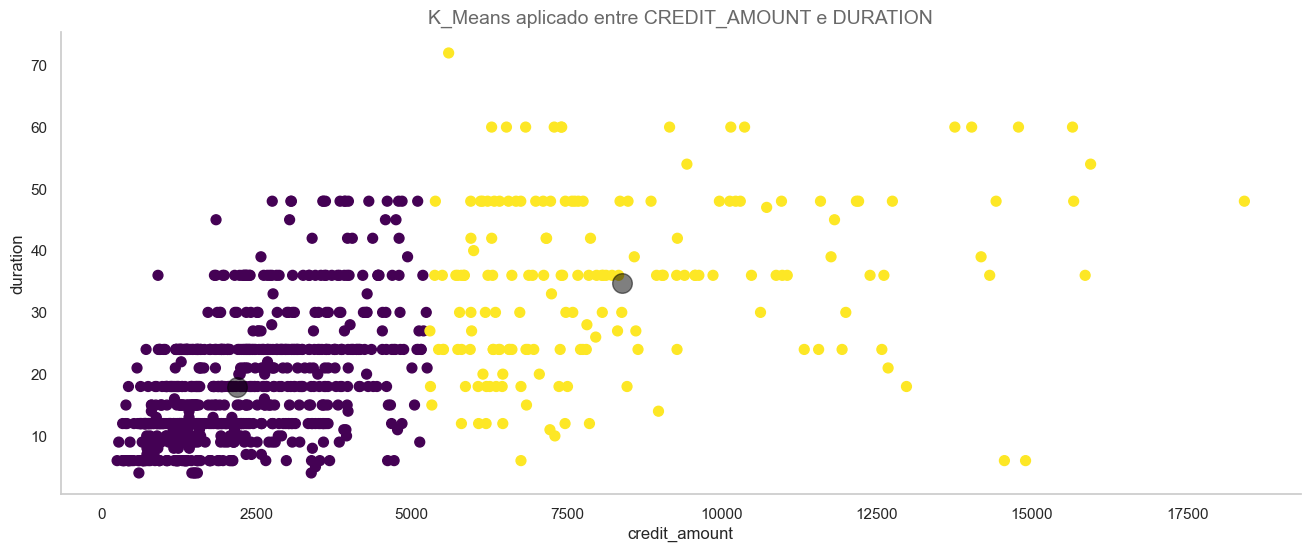

In [23]:
model = KMeans(n_clusters=2)
cluster_data
model.fit(cluster_data)
plot_kmeans_clusters_2d(cluster_data, model)

### Markdown Notes:

This part of the code involves creating a target column for classification tasks based on the existing 'risk' column.

- **Creating Target Column**:
  - A new column named 'target' is created in the DataFrame `df`.
  - The values in the 'target' column are determined based on the values in the 'risk' column.
  - If the 'risk' column value is 'bad', the corresponding 'target' value is set to 1; otherwise, it is set to 0.

- **Drop the 'risk' Column**:
  - After creating the 'target' column, the 'risk' column is dropped from the DataFrame `df` using the `drop()` method with the axis parameter set to 1 (indicating column-wise operation).

- **Output**:
  - The output is the DataFrame `df` with the newly created 'target' column and the 'risk' column removed.
  - This transformation is typically done in binary classification tasks to prepare the target variable for modeling.


In [24]:
# Creating a target column
df['target'] = df['risk'].apply(lambda x: 1 if x == 'bad' else 0)
df.drop('risk', axis=1, inplace=True)
df.head()

age     sex  job housing saving_accounts checking_account  credit_amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   duration              purpose  target  
0         6             radio/TV       0  
1        48             radio/TV       1  
2        12            education       0  
3        42  furniture/equipment       0  
4        24                  car       1

### Markdown Notes:

This section of the code involves building and applying a preprocessing pipeline to prepare the data for modeling.

- **Building Preprocessing Pipeline**:
  - A pipeline named `preprocessing_pipeline` is created using the `Pipeline` class from scikit-learn.
  - The pipeline consists of two steps:
    1. `DropDuplicates()`: Custom transformer to remove duplicate rows from the dataset.
    2. `SplitData(target='target')`: Custom transformer to split the dataset into features (X) and target variable (y) based on the 'target' column.
    
- **Applying the Pipeline**:
  - The `fit_transform()` method is used to apply the preprocessing pipeline to the DataFrame `df`.
  - It returns four sets of data: `X_train`, `X_test`, `y_train`, and `y_test`.
  
- **Output**:
  - The shapes of the training and testing feature sets (`X_train` and `X_test`) are printed to provide insights into the size of the datasets after preprocessing.


In [25]:
# Building the preprocessing Pipeline
preprocessing_pipeline = Pipeline([
    ('dup_dropped', DropDuplicates()),
    ('data_splitter', SplitData(target='target'))
])

# Applying this pipeline
X_train, X_test, y_train, y_test = preprocessing_pipeline.fit_transform(df)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (800, 9)
Shape of X_test: (200, 9)


### Markdown Notes:

This section of the code involves splitting the data by data type, building separate preprocessing pipelines for numerical and categorical features, and combining them into a single preprocessing pipeline using `ColumnTransformer`.

- **Splitting Data by Data Type**:
  - The feature columns are divided into two lists based on their data types: numerical features (`num_features`) and categorical features (`cat_features`).

- **Building Numerical Pipeline**:
  - A pipeline named `num_pipeline` is created using the `Pipeline` class from scikit-learn.
  - It consists of a single step:
    - `StandardScaler()`: Standardizes numerical features by scaling them to have a mean of 0 and a standard deviation of 1.

- **Building Categorical Pipeline**:
  - A pipeline named `cat_pipeline` is created using the `Pipeline` class from scikit-learn.
  - It consists of a single step:
    - `DummiesEncoding(dummy_na=True)`: Encodes categorical features into dummy variables, handling missing values (if any) by creating an additional dummy column.

- **Building Complete Pipeline**:
  - The `ColumnTransformer` class from scikit-learn is used to combine the numerical and categorical pipelines.
  - It specifies two transformers: one for numerical features and the other for categorical features.
  - The `num_pipeline` is applied to numerical features, and the `cat_pipeline` is applied to categorical features.


In [26]:
# Splitting the data by dtype
num_features = [col for col, dtype in X_train.dtypes.items() if dtype != 'object']
cat_features = [col for col, dtype in X_train.dtypes.items() if dtype == 'object']

# Building a numerical pipeline
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Building a categorical pipeline
cat_pipeline = Pipeline([
    ('encoder', DummiesEncoding(dummy_na=True))
])

# Building a complete pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

### Markdown Notes:

In this part of the code, the preprocessing pipeline is applied to transform the training and testing datasets.

- **Applying the Preprocessing Pipeline**:
  - The `fit_transform()` method is used to transform both the training (`X_train`) and testing (`X_test`) datasets using the complete preprocessing pipeline (`full_pipeline`).
  - The transformed datasets are stored as `X_train_prep` and `X_test_prep`, respectively.

- **Shape of Transformed Datasets**:
  - The dimensions of the transformed datasets are printed using the `shape` attribute.
  - It provides the number of samples and features in each dataset after applying the preprocessing steps.


In [27]:
# Applying the data prep pipeline
X_train_prep = full_pipeline.fit_transform(X_train)
X_test_prep = full_pipeline.fit_transform(X_test)

print(f'Shape of X_train_prep: {X_train_prep.shape}')
print(f'Shape of X_test_prep: {X_test_prep.shape}')

Shape of X_train_prep: (800, 29)
Shape of X_test_prep: (200, 29)


### Markdown Notes:

In this section, the final features of the dataset after preprocessing are returned and displayed.

- **Extracting Final Features**:
  - The `features_after_encoding` attribute of the categorical encoder is accessed to retrieve the final encoded features.
  - The numerical features (`num_features`) and the encoded categorical features (`encoded_features`) are concatenated to form the `model_features` list.
  
- **Creating DataFrame with Preprocessed Data**:
  - A new DataFrame (`df_train_prep`) is created using the preprocessed training data (`X_train_prep`) and the `model_features` list as column names.
  - This DataFrame displays the preprocessed training data with the final set of features.


In [28]:
# Returning the final features of the dataset
encoded_features = full_pipeline.named_transformers_['cat']['encoder'].features_after_encoding
model_features = num_features + encoded_features
df_train_prep = pd.DataFrame(X_train_prep, columns=model_features)
df_train_prep.head()

age       job  credit_amount  duration  sex_female  sex_male  sex_nan  \
0  2.406187  0.107048       1.199912  3.297082         0.0       1.0      0.0   
1 -0.224364  0.107048      -0.359630 -0.008051         0.0       1.0      0.0   
2  1.266282  0.107048      -0.733547 -1.279256         0.0       1.0      0.0   
3 -0.575104  0.107048       0.567050 -0.008051         1.0       0.0      0.0   
4 -1.276585  0.107048      -0.854388 -0.770774         1.0       0.0      0.0   

   housing_free  housing_own  housing_rent  ...  checking_account_nan  \
0           0.0          1.0           0.0  ...                   0.0   
1           0.0          0.0           1.0  ...                   0.0   
2           0.0          0.0           1.0  ...                   1.0   
3           0.0          1.0           0.0  ...                   1.0   
4           0.0          1.0           0.0  ...                   1.0   

   purpose_business  purpose_car  purpose_domestic appliances  \
0               1.0          0.0                          0.0   
1               0.0          0.0                          0.0   
2               0.0          1.0                          0.0   
3               0.0          1.0                          0.0   
4               0.0          0.0                          0.0   

   purpose_education  purpose_furniture/equipment  purpose_radio/TV  \
0                0.0                          0.0               0.0   
1                1.0                          0.0               0.0   
2                0.0                          0.0               0.0   
3                0.0                          0.0               0.0   
4                0.0                          0.0               1.0   

   purpose_repairs  purpose_vacation/others  purpose_nan  
0              0.0                      0.0          0.0  
1              0.0                      0.0          0.0  
2              0.0                      0.0          0.0  
3              0.0                      0.0          0.0  
4              0.0                      0.0          0.0  

[5 rows x 29 columns]

### Markdown Notes:

Here, hyperparameters for different classification models are defined for hyperparameter tuning:

#### Logistic Regression Hyperparameters:
- **`C`**: Regularization parameter.
- **`penalty`**: Type of regularization (L1 or L2).
- **`class_weight`**: Weights associated with classes in the form `{class_label: weight}`.
- **`random_state`**: Seed for random number generation.
- **`solver`**: Algorithm to use in optimization problem.

#### Decision Trees Hyperparameters:
- **`criterion`**: The function to measure the quality of a split.
- **`max_depth`**: The maximum depth of the tree.
- **`max_features`**: The number of features to consider when looking for the best split.
- **`class_weight`**: Weights associated with classes in the form `{class_label: weight}`.
- **`random_state`**: Seed for random number generation.

#### Random Forest Hyperparameters:
- **`bootstrap`**: Whether bootstrap samples are used when building trees.
- **`max_depth`**: The maximum depth of the tree.
- **`n_estimators`**: The number of trees in the forest.
- **`max_features`**: The number of features to consider when looking for the best split.
- **`class_weight`**: Weights associated with classes in the form `{class_label: weight}`.
- **`random_state`**: Seed for random number generation.

#### LightGBM Hyperparameters:
- **`num_leaves`**: Maximum number of leaves in one tree.
- **`min_data_in_leaf`**: Minimal number of data in one leaf.
- **`max_depth`**: Limit the max depth for tree model.
- **`learning_rate`**: Boosting learning rate.
- **`bagging_freq`**: Frequency for bagging.
- **`bagging_fraction`**: Fraction for bagging.
- **`reg_alpha`**: L1 regularization term on weights.
- **`reg_lambda`**: L2 regularization term on weights.

Additionally, some fixed parameters are set for LightGBM, such as `application`, `objective`, `metric`, etc.


In [29]:
# Logistic Regression hyperparameters
logreg_param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'solver': ['liblinear']
}

# Decision Trees hyperparameters
tree_param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5, 10, 20],
    'max_features': np.arange(1, X_train.shape[1]),
    'class_weight': ['balanced', None],
    'random_state': [42]
}

# Random Forest hyperparameters
forest_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [3, 5, 10, 20, 50],
    'n_estimators': [50, 100, 200, 500],
    'random_state': [42],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced', None]
}

# LightGBM hyperparameters
lgbm_param_grid = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10),
}

lgbm_fixed_params = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

### Markdown Notes:

In this section, a dictionary named `set_classifiers` is defined to set up different classifiers along with their corresponding hyperparameters for hyperparameter tuning:

#### Logistic Regression:
- **Model**: Logistic Regression classifier.
- **Parameters**: Parameters such as `C`, `penalty`, `class_weight`, `random_state`, and `solver` are defined for hyperparameter tuning.

#### Decision Trees:
- **Model**: Decision Tree classifier.
- **Parameters**: Hyperparameters include `criterion`, `max_depth`, `max_features`, `class_weight`, and `random_state` for tuning.

#### Random Forest:
- **Model**: Random Forest classifier.
- **Parameters**: Parameters like `bootstrap`, `max_depth`, `n_estimators`, `max_features`, `class_weight`, and `random_state` are specified for tuning.

#### LightGBM:
- **Model**: LightGBM classifier.
- **Parameters**: Various parameters such as `num_leaves`, `min_data_in_leaf`, `max_depth`, `learning_rate`, `bagging_freq`, `bagging_fraction`, `reg_alpha`, and `reg_lambda` are set for tuning. Additionally, fixed parameters like `application`, `objective`, `metric`, etc., are provided to the LightGBM classifier.


In [30]:
# Setting up classifiers
set_classifiers = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': logreg_param_grid
    },
    'DecisionTrees': {
        'model': DecisionTreeClassifier(),
        'params': tree_param_grid
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': forest_param_grid
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(**lgbm_fixed_params),
        'params': lgbm_param_grid
    }
}

### Markdown Notes:

In this section, an instance of the homemade class `BinaryClassifiersAnalysis` is created and utilized to fit various binary classifiers with the provided training data. Here's a breakdown:

- **Instance Creation**: 
  - An instance named `clf_tool` of the `BinaryClassifiersAnalysis` class is created.

- **Method Call**: 
  - The `fit` method of `BinaryClassifiersAnalysis` is called to fit the classifiers defined in the `set_classifiers` dictionary.
  - Parameters passed to the method include:
    - `set_classifiers`: A dictionary containing classifiers and their respective hyperparameters.
    - `X_train_prep`: Preprocessed training features.
    - `y_train`: Target labels for training.
    - `random_search=True`: Indicates that Randomized Search Cross Validation will be used for hyperparameter tuning.
    - `cv=5`: Number of folds for cross-validation is set to 5.
    - `verbose=5`: Verbose level is set to 5 to display detailed output during the fitting process.


In [31]:
# Creating an instance for the homemade class BinaryClassifiersAnalysis
clf_tool = BinaryClassifiersAnalysis()
clf_tool.fit(set_classifiers, X_train_prep, y_train, random_search=True, cv=5, verbose=5)

Training model LogisticRegression

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=3.747368421052632, class_weight=None, penalty=l1, random_state=42, solver=liblinear;, score=0.789 total time=   0.0s
[CV 2/5] END C=3.747368421052632, class_weight=None, penalty=l1, random_state=42, solver=liblinear;, score=0.748 total time=   0.0s
[CV 1/5] END C=2.7052631578947373, class_weight=None, penalty=l1, random_state=42, solver=liblinear;, score=0.789 total time=   0.0s
[CV 3/5] END C=2.7052631578947373, class_weight=None, penalty=l1, random_state=42, solver=liblinear;, score=0.685 total time=   0.0s
[CV 2/5] END C=2.7052631578947373, class_weight=None, penalty=l1, random_state=42, solver=liblinear;, score=0.749 total time=   0.0s
[CV 4/5] END C=2.7052631578947373, class_weight=None, penalty=l1, random_state=42, solver=liblinear;, score=0.792 total time=   0.0s
[CV 5/5] END C=2.7052631578947373, class_weight=None, penalty=l1, random_state=42, solver=liblinear;, score=

/Users/devarasumanth/anaconda3/lib/python3.11/site-packages/lightgbm/sklearn.py:683: UserWarning: Found 'application' in params. Will use it instead of 'objective' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'objective' argument")
/Users/devarasumanth/anaconda3/lib/python3.11/site-packages/lightgbm/sklearn.py:683: UserWarning: Found 'application' in params. Will use it instead of 'objective' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'objective' argument")
/Users/devarasumanth/anaconda3/lib/python3.11/site-packages/lightgbm/sklearn.py:683: UserWarning: Found 'application' in params. Will use it instead of 'objective' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'objective' argument")
/Users/devarasumanth/anaconda3/lib/python3.11/site-packages/lightgbm/sklearn.py:683: UserWarning: Found 'application' in params. Will use it instead of 'objective' argument
  _log_warning(f"Found '{alias}' in pa

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7555555555555555
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7555555555555555
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6

### Markdown Notes:

In this section, the performance metrics of the fitted classifiers are evaluated using the test set. Here's a summary:

- **Evaluation Metrics**:
  - The `evaluate_performance` method of `BinaryClassifiersAnalysis` is used to assess the performance of the classifiers.
  - The method computes various performance metrics such as accuracy, precision, recall, F1-score, and ROC AUC.
  - Training and testing datasets (`X_train_prep`, `y_train`, `X_test_prep`, `y_test`) are provided for evaluation.
  - Cross-validation with 5 folds (`cv=5`) is used for robust evaluation.
  
- **Data Presentation**:
  - The performance metrics are presented in a DataFrame named `df_performances`.
  - The DataFrame is displayed with background gradient using the 'Blues' colormap for enhanced readability.
  - The index is reset to improve the visual clarity of the table.


In [32]:
# Evaluating metrics
df_performances = clf_tool.evaluate_performance(X_train_prep, y_train, X_test_prep, y_test, cv=5)
df_performances.reset_index(drop=True).style.background_gradient(cmap='Blues')

Evaluating model LogisticRegression

Evaluating model DecisionTrees

Evaluating model RandomForest

Evaluating model LightGBM

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7555555555555555
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75555555

### Model Evaluation Metrics:

|    Model            |     Approach          |  Accuracy | Precision | Recall | F1-Score | ROC AUC | Total Time |
|---------------------|-----------------------|-----------|-----------|--------|----------|---------|------------|
| LogisticRegression  | Treino 5 K-folds      |  0.740    |  0.611    | 0.394  |  0.478   | 0.755   |   0.076    |
| LogisticRegression  | Teste                 |  0.745    |  0.605    | 0.390  |  0.474   | 0.754    |   0.002    |
| DecisionTrees       | Treino 5 K-folds      |  0.656    |  0.450    | 0.581  |  0.505   | 0.649   |   0.046    |
| DecisionTrees       | Teste                 |  0.680    |  0.464    | 0.542  |  0.500   | 0.693    |   0.002    |
| RandomForest        | Treino 5 K-folds      |  0.720    |  0.630    | 0.179  |  0.276   | 0.757   |   6.753    |
| RandomForest        | Teste                 |  0.745    |  0.722    | 0.220  |  0.338   | 0.782    |   0.027    |
| LightGBM            | Treino 5 K-folds      |  0.692    |  0.497    | 0.710  |  0.582   | 0.754   |   0.205    |
| LightGBM            | Teste                 |  0.700    |  0.495    | 0.780  |  0.605   | 0.789    |   0.003    |

- **Accuracy**: The proportion of correctly classified instances.
- **Precision**: The proportion of true positive predictions among all positive predictions.
- **Recall**: The proportion of true positive predictions among all actual positives.
- **F1-Score**: The harmonic mean of precision and recall, balancing false positives and false negatives.
- **ROC AUC**: The area under the Receiver Operating Characteristic curve, measuring the model's ability to distinguish between classes.
- **Total Time**: The total time taken for training or evaluation.

### LightGBM Feature Importance Analysis:

The figure above displays the feature importance analysis for the LightGBM classifier. Here are some key points regarding feature importance:

- **Feature Importance**: This analysis helps understand which features contribute the most to the model's predictive power.
- **Y-Axis**: Represents the features used in the analysis.
- **X-Axis**: Indicates the importance of each feature, typically measured by metrics like information gain or split count.
- **Insights**: Features with higher importance contribute more significantly to the model's predictions. Understanding feature importance can guide feature selection and model interpretation.



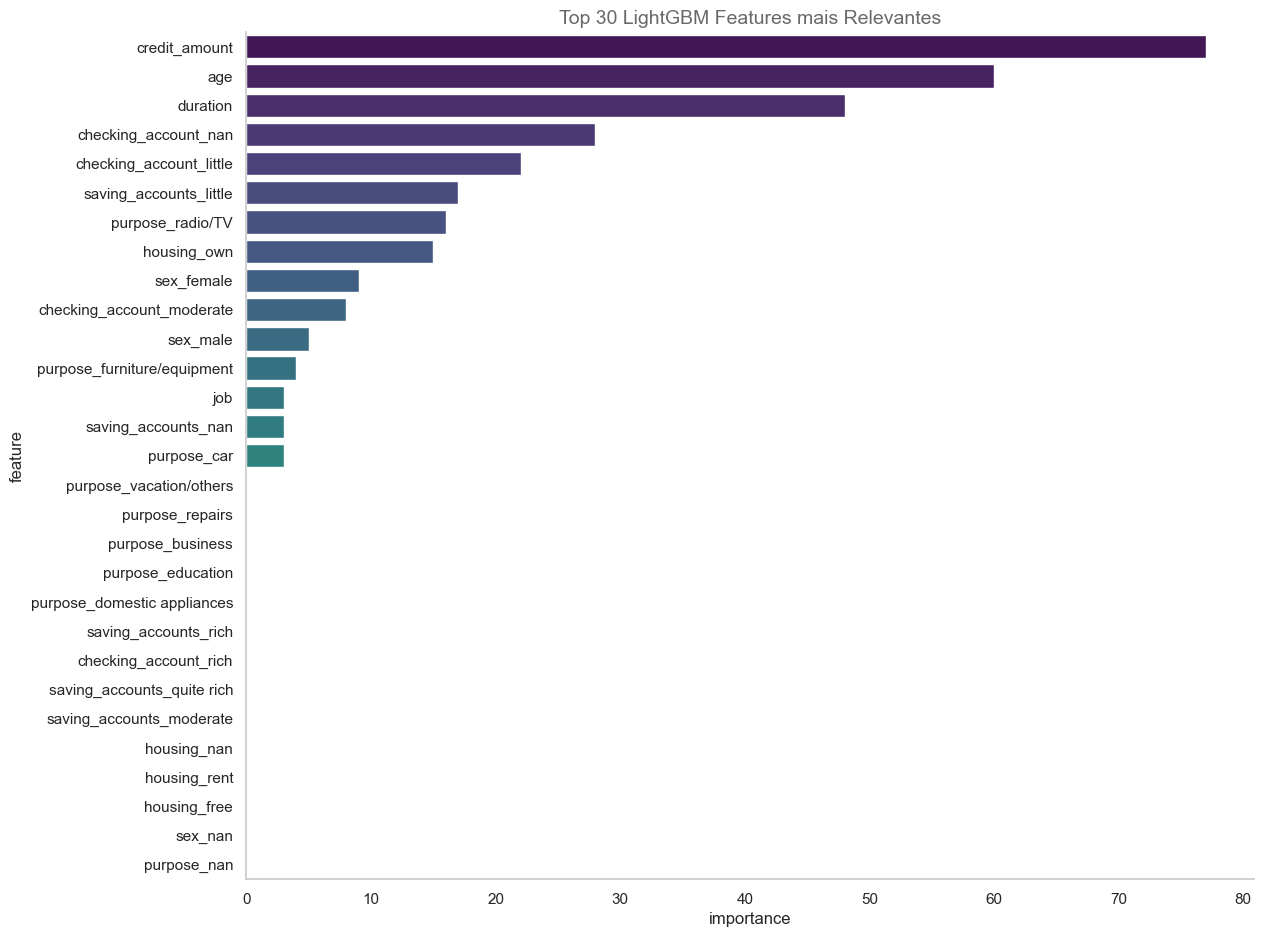

In [33]:
fig, ax = plt.subplots(figsize=(13, 11))
lgbm_feature_importance = clf_tool.feature_importance_analysis(model_features, specific_model='LightGBM', ax=ax)
plt.show()

### Receiver Operating Characteristic (ROC) Curve:

The ROC curve visualizes the performance of binary classification models across various threshold settings. Here's an overview of the ROC curve:

- **X-Axis (False Positive Rate)**: Represents the false positive rate, which measures the proportion of negative instances incorrectly classified as positive.
- **Y-Axis (True Positive Rate)**: Indicates the true positive rate, which measures the proportion of positive instances correctly classified as positive.
- **Diagonal Line**: Represents random guessing, where the model has no discriminatory power.
- **Curve**: The ROC curve demonstrates how well the model discriminates between positive and negative classes across different threshold settings.
- **Area Under the Curve (AUC)**: AUC quantifies the overall performance of the model. A higher AUC value indicates better discriminative power.



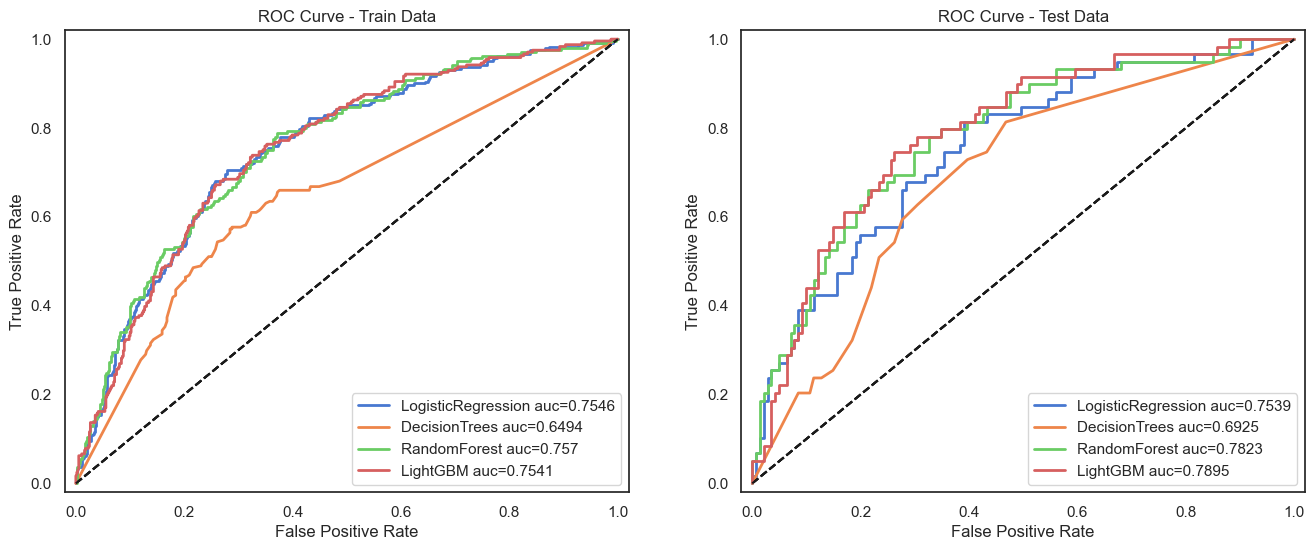

In [34]:
clf_tool.plot_roc_curve()

### Confusion Matrix:

The confusion matrix is a useful visualization for evaluating the performance of a classification model. It provides insights into the model's predictions compared to the actual class labels. Here's what each component represents:

- **True Positive (TP)**: Instances correctly predicted as positive.
- **True Negative (TN)**: Instances correctly predicted as negative.
- **False Positive (FP)**: Instances incorrectly predicted as positive (Type I error).
- **False Negative (FN)**: Instances incorrectly predicted as negative (Type II error).

The matrix typically visualizes these values in a tabular format, with the actual class labels forming the rows and the predicted class labels forming the columns.



[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7555555555555555
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7555555555555555
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_lea

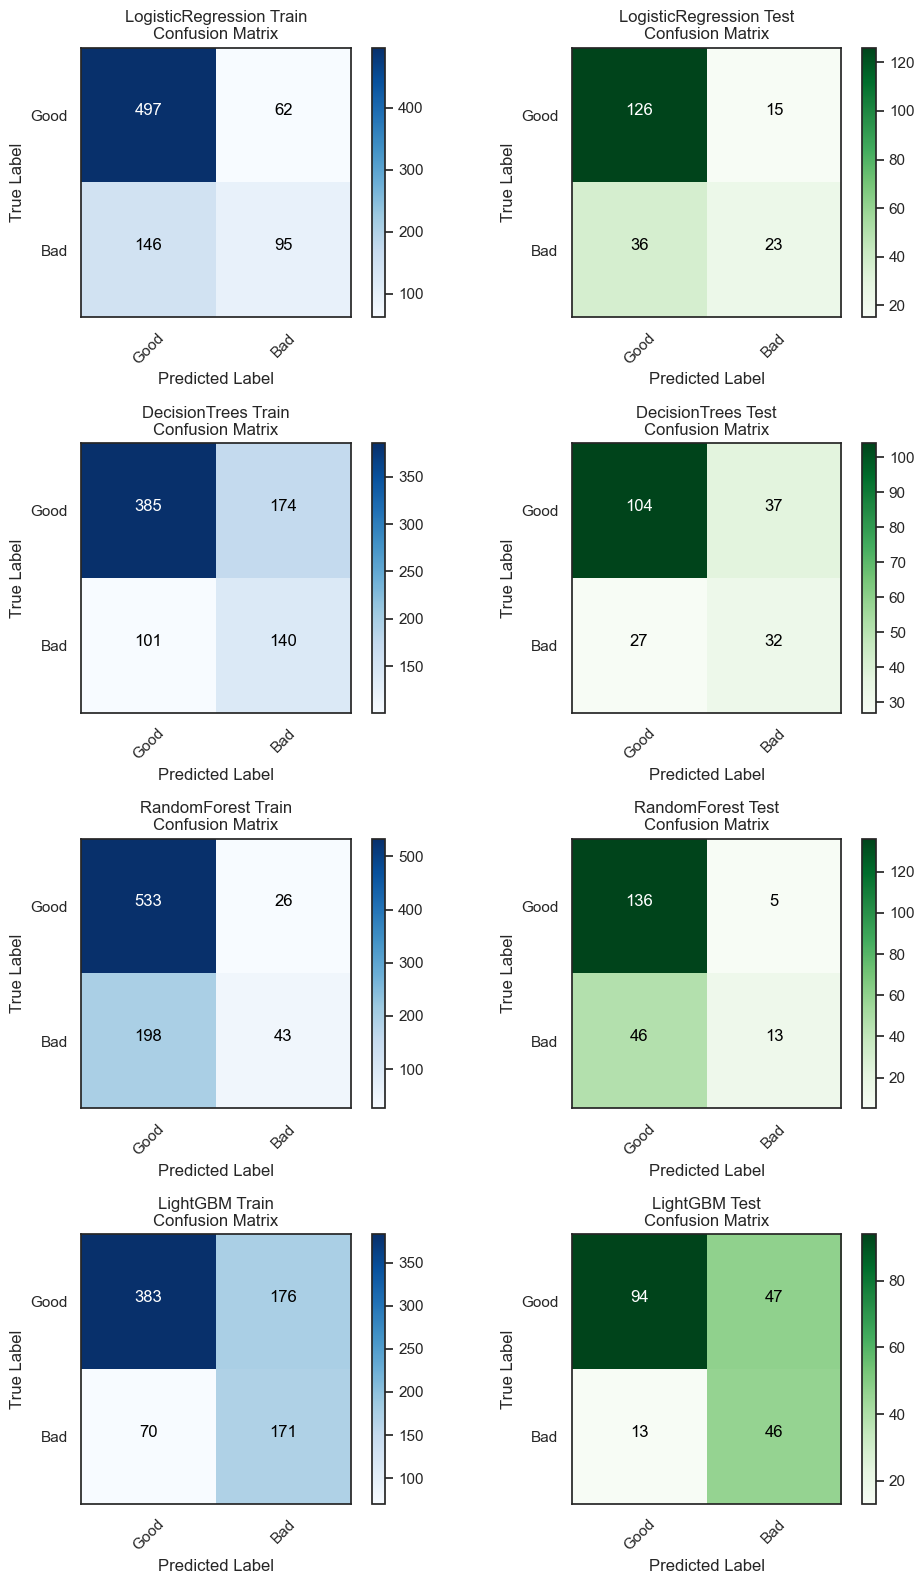

In [35]:
clf_tool.plot_confusion_matrix(classes=['Good', 'Bad'])

### Learning Curve Analysis:

Learning curves depict the performance of a machine learning model as a function of the training data size. They are valuable tools for assessing whether a model would benefit from additional training instances or if it's suffering from issues like overfitting or underfitting.

Key Components:
- **Training Score**: Indicates the model's performance on the training set.
- **Cross-validation Score**: Reflects the model's performance on a validation set, typically obtained through cross-validation.
- **Training Data Size**: Represents the number of instances used for training.

Interpretation:
- **High Bias (Underfitting)**: If both training and cross-validation scores are low and converge at a low value, the model may be too simple to capture the underlying patterns in the data.
- **High Variance (Overfitting)**: A significant gap between the training and cross-validation scores suggests overfitting, where the model performs well on the training set but poorly on unseen data.
- **Ideal Scenario**: The training and cross-validation scores converge at high values, indicating a good balance between bias and variance.

Adjustments:
- **Increase Training Data**: If the model suffers from high variance, providing more training data may help it generalize better.
- **Model Complexity**: Adjusting the model's complexity, such as changing hyperparameters, may alleviate issues related to bias or variance.

In the learning curve, you typically want to see both training and cross-validation scores increasing and converging to a high value, indicating a well-generalized model.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7555555555555555
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.

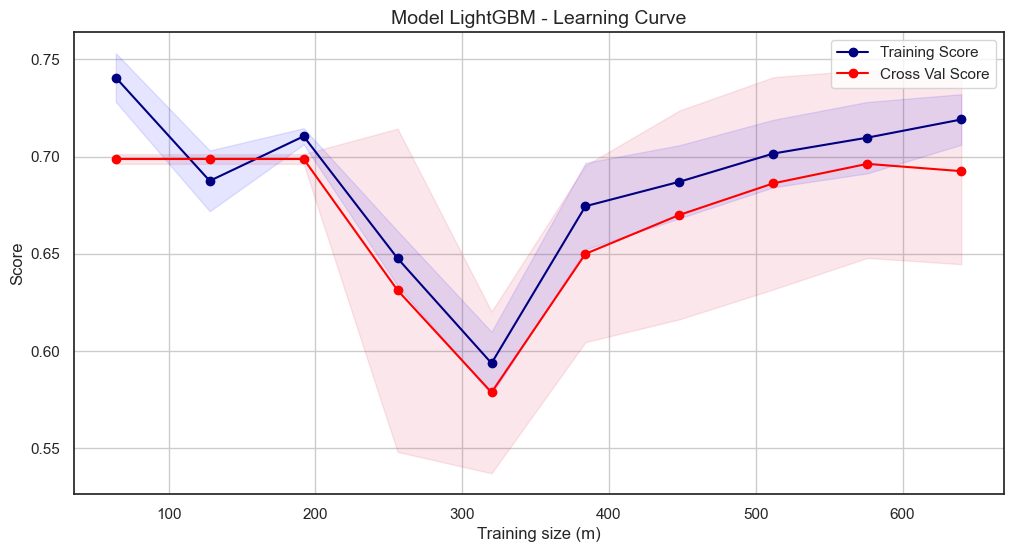

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
clf_tool.plot_learning_curve('LightGBM', ax=ax)
plt.show()

### Score Distribution Analysis for LightGBM Model:

The score distribution analysis provides insights into the distribution of predicted scores generated by the LightGBM model. This visualization aids in understanding how well the model separates the classes and the spread of scores across different instances.

Key Elements:
- **Density Curve**: The shaded area represents the kernel density estimate (KDE) of the score distribution. It indicates the likelihood of finding a score within a certain range.
- **Score Range**: The x-axis displays the range of scores generated by the model.
- **Density Scale**: The y-axis represents the density of scores, indicating how densely the scores are distributed across the range.

Interpretation:
- **Separation of Classes**: A clear separation between classes is desirable, where the distribution of scores for each class is distinct.
- **Skewness**: If the distribution is skewed towards one class, it suggests potential biases in the model's predictions.
- **Spread**: The spread of scores provides insights into the model's confidence level in its predictions. A wider spread indicates greater uncertainty.

Adjustments:
- **Calibration**: If the distribution is skewed or lacks separation, calibrating the model's probabilities or adjusting class weights may help improve performance.
- **Feature Engineering**: Enhancing feature selection or engineering may aid in improving the model's ability to distinguish between classes.

The score distribution analysis helps in assessing the reliability and performance of the LightGBM model by providing insights into its prediction behavior across different instances.


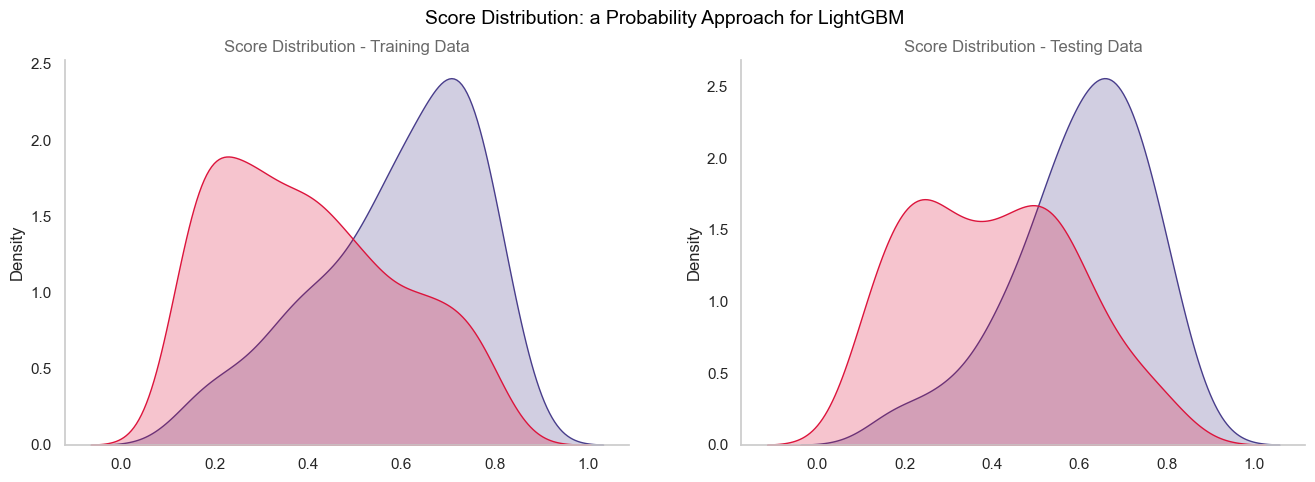

In [37]:
clf_tool.plot_score_distribution('LightGBM', shade=True)

### Score Bins Analysis for LightGBM Model:

The score bins analysis presents a breakdown of the distribution of predicted scores into discrete bins, allowing for a granular examination of the model's performance across different score ranges.

Key Elements:
- **Score Range**: The x-axis represents the range of predicted scores.
- **Frequency**: The y-axis displays the frequency or count of instances falling within each score bin.
- **Bin Size**: Each bin represents a specific range of predicted scores.

Interpretation:
- **Distribution Pattern**: Analyzing the distribution pattern across score bins helps assess the model's performance consistency.
- **Peak Frequencies**: Peaks in certain score ranges indicate areas where the model is most confident or where instances are more concentrated.
- **Outlier Detection**: Spikes or deviations from the expected distribution may highlight areas of interest for further investigation, such as potential misclassifications or model biases.

Adjustments:
- **Threshold Optimization**: Adjusting classification thresholds based on score bins can fine-tune the model's sensitivity and specificity.
- **Model Refinement**: Identifying score ranges with suboptimal performance may guide feature engineering or model parameter tuning efforts.

The score bins analysis provides a detailed view of the LightGBM model's predictive behavior across various score ranges, aiding in understanding its strengths, weaknesses, and areas for improvement.


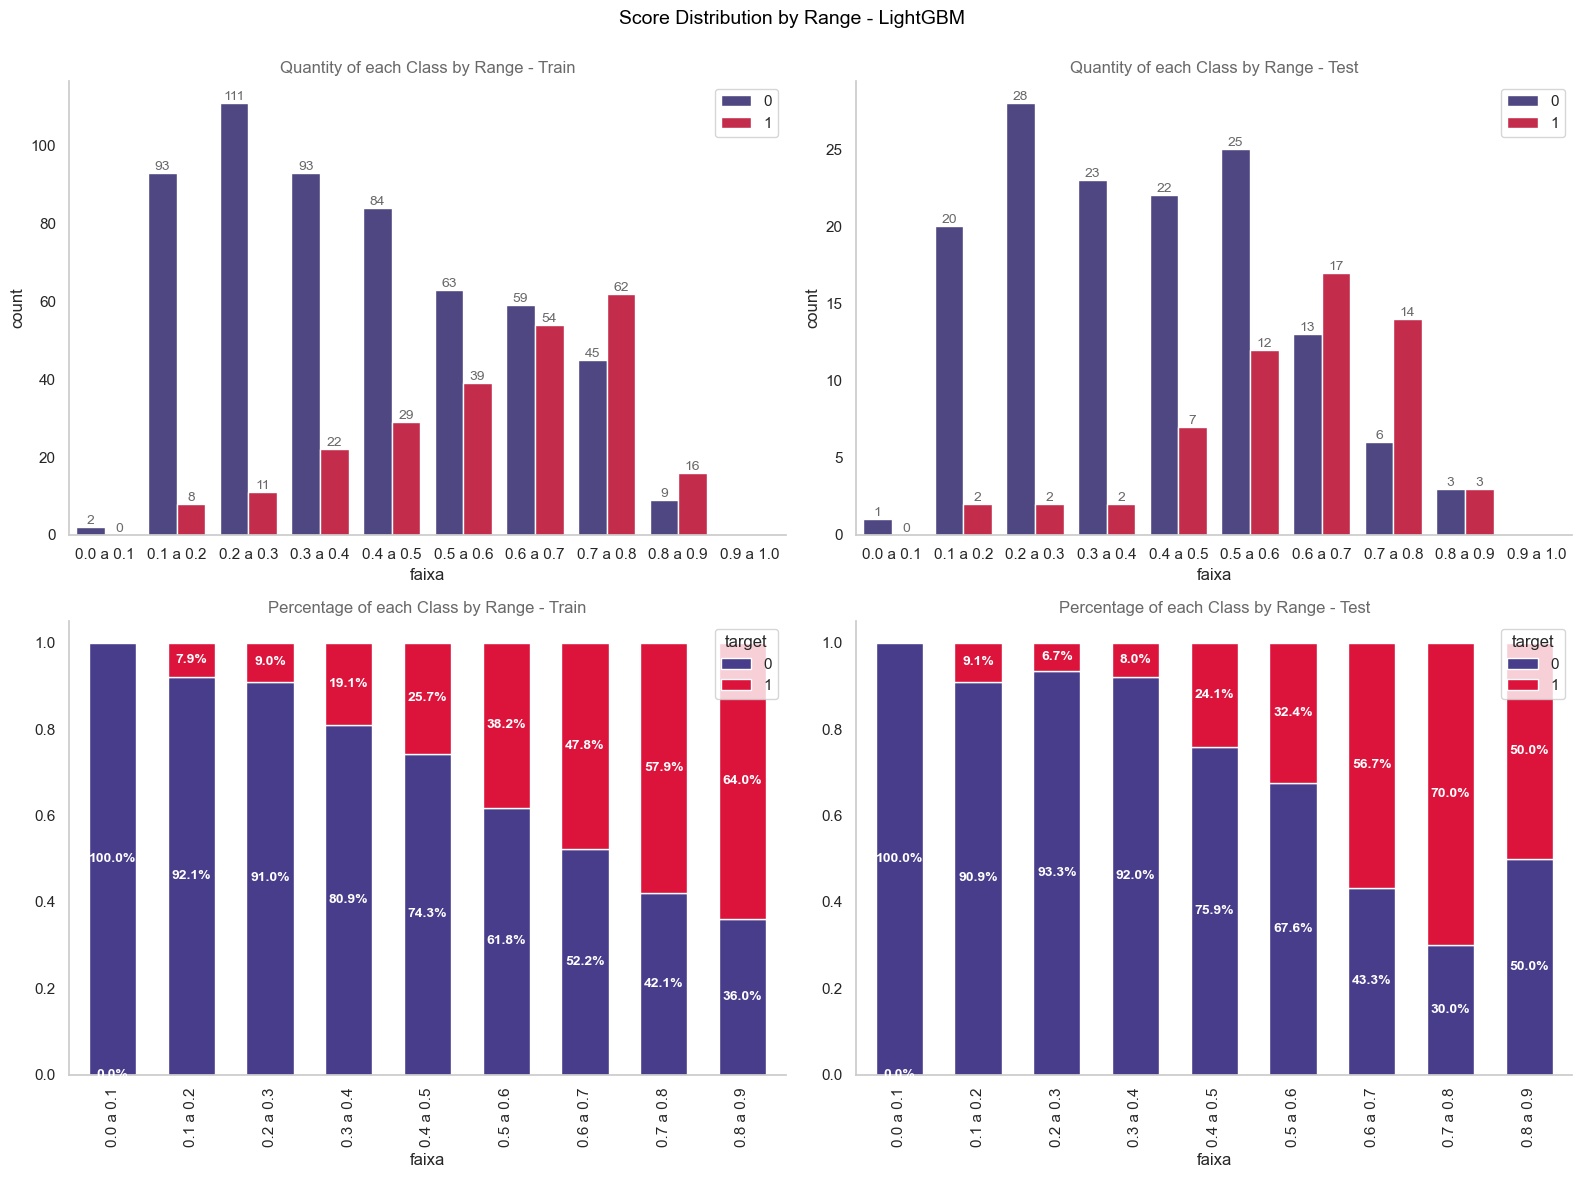

In [38]:
clf_tool.plot_score_bins(model_name='LightGBM', bin_range=0.1)

### Scoring and Binning Analysis for German Credit Data:

This analysis encompasses the process of scoring and binning the German Credit Data based on the LightGBM model's predictions. It provides insights into the model's classifications and their associated confidence scores.

#### Overview:
- **Data Preparation**: The raw data is preprocessed using the predefined pipeline, ensuring consistency and compatibility with the trained model.
- **Model Prediction**: The trained LightGBM model predicts the credit risk for each instance in the dataset, generating both class predictions and confidence scores.
- **Binning Process**: The confidence scores are segmented into bins, facilitating the interpretation and analysis of model predictions across different confidence levels.

#### Key Steps:
1. **Data Preprocessing**: Raw data is read from the CSV file and processed using the established pipeline, preparing it for model inference.
2. **Model Inference**: The preprocessed data is fed into the trained LightGBM model to obtain predictions and corresponding confidence scores.
3. **Binning Procedure**: Confidence scores are partitioned into bins based on predefined percentiles, enabling the categorization of predictions into distinct confidence intervals.
4. **Data Augmentation**: Predictions, confidence scores, and assigned bins are appended to the original dataset, enriching it with model-derived insights.

#### Interpretation:
- **Predicted Classes**: Each instance is classified as "Good" or "Bad" credit risk based on the model's predictions.
- **Confidence Scores**: The degree of certainty associated with each prediction is quantified through confidence scores.
- **Score Bins**: Confidence scores are grouped into bins, allowing for the analysis of model performance across different levels of confidence.

#### Insights and Applications:
- **Risk Stratification**: Instances can be stratified based on predicted risk levels, guiding decision-making processes related to credit approval or rejection.
- **Model Confidence**: Analysis of confidence score distributions provides insights into the model's level of certainty and potential areas of uncertainty.
- **Performance Evaluation**: Binned predictions enable the assessment of model performance across various confidence intervals, informing adjustments and improvements.

The scoring and binning analysis offer a comprehensive understanding of the LightGBM model's behavior and its implications for credit risk assessment in the German Credit Data context.


In [39]:
# Libs
import pandas as pd
from utils.custom_transformers import *
from sklearn.pipeline import Pipeline

# Reading the raw data
df_ori = import_data('german_credit_data.csv', optimized=True)
df = df_ori.iloc[:, 1:]
df.columns = [col.lower().strip().replace(' ', '_') for col in df.columns]
df['target'] = df['risk'].apply(lambda x: 1 if x == 'bad' else 0)
df.drop('risk', axis=1, inplace=True)

# Applying the data prep pipeline (the pkl file could be read from a specific path)
scoring_data = full_pipeline.fit_transform(df)

# Using the trained model for predicting (the pkl file could be read from a specific path)
model = clf_tool.classifiers_info['LightGBM']['estimator']
y_pred = model.predict(scoring_data)
y_score = model.predict_proba(scoring_data)[:, 1]

# Appending the predictions to the data
df['y_score'] = y_score
df['y_pred'] = y_pred
df['y_class'] = df['y_pred'].apply(lambda x: 'Bad' if x == 1 else 'Good')

# Creating bins
bins = df['y_score'].quantile(np.arange(0, 1.01, 0.1)).values
labels = ['Rnge ' + str(i) for i in range(len(bins)-1, 0, -1)]
df['Rnge'] = pd.cut(df['y_score'], bins=bins, labels=labels, include_lowest=True)
df.head()

This dataset has 11 columns, which 5 is/are applicable to optimization.

----------------------------------------------------
Memory usage (50 lines): 0.0043 MB
Memory usage after optimization (50 lines): 0.0034 MB
----------------------------------------------------

Reduction of 22.07% on memory usage

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7555555555555555
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be igno

age     sex  job housing saving_accounts checking_account  credit_amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   duration              purpose  target   y_score  y_pred y_class     Rnge  
0         6             radio/TV       0  0.385302       0    Good   Rnge 6  
1        48             radio/TV       1  0.747524       1     Bad   Rnge 1  
2        12            education       0  0.135433       0    Good  Rnge 10  
3        42  furniture/equipment       0  0.794222       1     Bad   Rnge 1  
4        24                  car       1  0.732148       1     Bad   Rnge 1